<a href="https://colab.research.google.com/github/Yongshilin/Forage-BCG-DA/blob/main/Forage_BCG_Task_2_EDA(revised).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

##### Analysis Done By Yongshi Lin

## 1.Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Shows plots in jupyter notebook
%matplotlib inline
# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [2]:
client_df = pd.read_csv('client_data.csv')
price_df = pd.read_csv('price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [3]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


##### In client's dataset, missing values are in other form, like "MISSING".

In [4]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## 2.Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


##### All of the datetime related columns are not currently in datetime format. We will need to convert these later.

### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [7]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


##### We have some highly skewed data, as exhibited by the percentile values.

In [8]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


##### The Price dataset looks good.

### Check unique values

In [8]:
client_df.nunique()

,0
id,14606
channel_sales,8
cons_12m,11065
cons_gas_12m,2112
cons_last_month,4751
date_activ,1796
date_end,368
date_modif_prod,2129
date_renewal,386
forecast_cons_12m,13993


In [9]:
price_df.nunique()

,0
id,16096
price_date,12
price_off_peak_var,1853
price_peak_var,1189
price_mid_peak_var,711
price_off_peak_fix,66
price_peak_fix,31
price_mid_peak_fix,28


### Check for missing value

##### From the above observation of client dataset, we know the dataset uses "MISSING" for the missing values. Count the missing values for each column:

In [10]:
# Function to count "MISSING" per column
def count_missing(df):
    return df.apply(lambda col: col.apply( lambda x: x == 'MISSING').sum())

# Count "MISSING" values
missing_count = count_missing(client_df)

print(missing_count)

id                                   0
channel_sales                     3725
cons_12m                             0
cons_gas_12m                         0
cons_last_month                      0
date_activ                           0
date_end                             0
date_modif_prod                      0
date_renewal                         0
forecast_cons_12m                    0
forecast_cons_year                   0
forecast_discount_energy             0
forecast_meter_rent_12m              0
forecast_price_energy_off_peak       0
forecast_price_energy_peak           0
forecast_price_pow_off_peak          0
has_gas                              0
imp_cons                             0
margin_gross_pow_ele                 0
margin_net_pow_ele                   0
nb_prod_act                          0
net_margin                           0
num_years_antig                      0
origin_up                           64
pow_max                              0
churn                    

In [11]:
price_df.isnull().sum()

,0
id,0
price_date,0
price_off_peak_var,0
price_peak_var,0
price_mid_peak_var,0
price_off_peak_fix,0
price_peak_fix,0
price_mid_peak_fix,0


#### Sum up: The client dataset's column "channel sales" has 3725 missing values(25% of the total rows), and the 'origin_up' has 64 missing rows. Since the information about 'code of the electricity campaign the customer first subscribed to' and 'code of the sales channel' won't affect our analysis goal, here we can keep them. The price dataset doesn't have missing values. The 2 datasets have shared column, "id".

---
## 3. Exploratory Data Analysis & Datat Visualization
As task 2 required, I am going to analyze the client dataset, focusing on the main issue:
- customer churn issue
- price sensitivity: the degree to which demand changes when the cost of a product/service changes. Here, it is measured using the price elasticity(the change in consumpiton in realtion to a change in its price) of demand for energy consumption.
- identifying patterns and relationships
- detecting anomalies and outliers

### Client Dataset

In [12]:
# identify categorical variables
print('These are vategorical variables:')
print({'has_gas': client_df['has_gas'].unique()[0:4],
      'churn': client_df['churn'].unique()[0:4]})

These are vategorical variables:
{'has_gas': array(['t', 'f'], dtype=object), 'churn': array([1, 0])}


In [13]:
# Select only the numerical columns and drop any categorical column
df1_dropped = client_df.drop(columns=['churn'])
num_df1 = df1_dropped.select_dtypes(include=['number'])

In [14]:
# Compute the correlation matrix
corr_matrix = num_df1.corr()
corr_matrix

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
cons_12m,1.000000,0.488474,0.968212,0.193947,0.167093,-0.043282,0.065268,-0.007748,0.145908,-0.026566,0.159711,-0.011926,-0.011905,0.154251,0.133614,-0.003565,0.082889
cons_gas_12m,0.488474,1.000000,0.507007,0.084359,0.080934,-0.012595,0.041393,-0.017684,0.074002,-0.020558,0.077846,0.006868,0.006852,0.239387,0.070867,-0.013815,0.054317
cons_last_month,0.968212,0.507007,1.000000,0.177773,0.193574,-0.040874,0.057476,-0.005187,0.136802,-0.023017,0.187034,-0.011498,-0.011477,0.169099,0.121835,-0.003677,0.074529
forecast_cons_12m,0.193947,0.084359,0.177773,1.000000,0.647727,0.058435,0.305627,-0.135646,0.254056,-0.018477,0.634600,-0.023220,-0.023231,0.055915,0.768537,0.021283,0.393946
forecast_cons_year,0.167093,0.080934,0.193574,0.647727,1.000000,0.008518,0.276009,-0.158012,0.251005,-0.044190,0.969395,-0.010759,-0.010727,0.040426,0.464928,0.048248,0.309647
forecast_discount_energy,-0.043282,-0.012595,-0.040874,0.058435,0.008518,1.000000,-0.008388,0.353735,0.059318,0.048024,0.037939,0.241142,0.240421,0.106812,0.079784,-0.070697,-0.005032
forecast_meter_rent_12m,0.065268,0.041393,0.057476,0.305627,0.276009,-0.008388,1.000000,-0.579353,0.706376,-0.203089,0.224212,0.183509,0.183566,0.018109,0.275830,0.071558,0.618549
forecast_price_energy_off_peak,-0.007748,-0.017684,-0.005187,-0.135646,-0.158012,0.353735,-0.579353,1.000000,-0.330138,0.630377,-0.092535,0.094498,0.094216,0.035093,-0.135107,-0.168095,-0.384397
forecast_price_energy_peak,0.145908,0.074002,0.136802,0.254056,0.251005,0.059318,0.706376,-0.330138,1.000000,-0.242017,0.212317,0.165483,0.165560,0.044141,0.234942,0.080260,0.411532
forecast_price_pow_off_peak,-0.026566,-0.020558,-0.023017,-0.018477,-0.044190,0.048024,-0.203089,0.630377,-0.242017,1.000000,-0.011318,-0.061869,-0.061925,-0.005335,-0.072623,-0.120136,-0.095897


##### 96.8% of the total variation in 'cons_12m' and 'cons_last_month' variables is very high, indicating that one is redundant to the other. We can reduce either column 'cons_12m' or 'cons_last_month' without losing much information.

#### Correlation analysis for data reduction
Since there are many columns in the dataset, compute its correlation of variables to see if we should remove variables that are strongly correlated to others is useful for avoiding multicollinearity problems.

In [15]:
cons_12m_var = num_df1.cons_12m.var()
print('cons_12m_var:', cons_12m_var)
cons_last_m_var = num_df1.cons_last_month.var()
print('cons_last_month_var:', cons_last_m_var)
variability_cc = cons_12m_var + cons_last_m_var
print('variability_cc:', variability_cc)
print('%cons_12m_var:', cons_12m_var/variability_cc * 100)
print('%cons_last_month_var:', cons_last_m_var/variability_cc * 100)

cons_12m_var: 328862409241.451
cons_last_month_var: 4142749781.018088
variability_cc: 333005159022.46906
%cons_12m_var: 98.75595027020631
%cons_last_month_var: 1.2440497297936943


##### This means that 'cons_12m' accounts for 98.8% of the total variability, and 'cons_last_month' accounts for the remaining 1.2%. If we drop one of the variables for the sake of dimension reduction, we lose only 1.2% of the total variability.

#### PCA Analysis

##### To see which variables we can remain or to transform a large set of variables into a smaller one that still contains most of the information, we can do a PCA analysis.

In [17]:
num_pcs = PCA()
num_pcs.fit(num_df1.dropna(axis=0))
num_pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(num_pcs.explained_variance_),
                           'Proportion of variance': num_pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(num_pcs.explained_variance_ratio_)})
num_pcsSummary_df = num_pcsSummary_df.transpose()
num_pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(num_pcsSummary_df.columns) + 1)]
num_pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
Standard deviation,582665.8053,140770.9853,15816.8342,3638.3867,1572.4937,197.8775,85.1656,60.6126,27.9863,9.2769,4.8705,4.3169,1.5836,0.6819,0.1871,0.0338,0.0116
Proportion of variance,0.9442,0.0551,0.0007,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Cumulative proportion,0.9442,0.9993,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [18]:
#PCA score
num_pcsComponents_df = pd.DataFrame(num_pcs.components_.transpose(), columns=num_pcsSummary_df.columns,
                                index=num_df1.columns)
num_pcsComponents_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
cons_12m,0.9836,-0.1464,-0.1057,0.0009,0.0022,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000
cons_gas_12m,0.1453,0.9892,-0.0176,0.0005,0.0002,-0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000
cons_last_month,0.1071,0.0020,0.9939,-0.0203,-0.0192,-0.0002,-0.0002,-0.0001,-0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000
forecast_cons_12m,0.0008,-0.0003,-0.0055,0.5308,-0.8408,-0.1065,-0.0001,0.0032,0.0018,-0.0015,-0.0003,-0.0002,-0.0000,-0.0000,0.0000,0.0000,-0.0000
forecast_cons_year,0.0009,-0.0002,0.0274,0.8413,0.5304,0.0054,-0.0951,0.0325,0.0034,-0.0017,0.0007,0.0005,-0.0001,0.0000,-0.0000,0.0000,0.0000
forecast_discount_energy,-0.0000,0.0000,0.0000,0.0001,-0.0002,0.0013,0.0069,-0.0029,0.0441,-0.0898,0.9697,-0.2217,0.0122,-0.0168,-0.0022,0.0007,-0.0012
forecast_meter_rent_12m,0.0000,0.0000,-0.0001,0.0056,-0.0034,0.0257,-0.2933,-0.9406,-0.1394,-0.0941,0.0004,0.0156,-0.0003,-0.0001,0.0000,0.0005,0.0002
forecast_price_energy_off_peak,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0001,0.0002,0.0002,-0.0003,0.0019,0.0025,-0.0003,0.0004,0.0003,-0.1159,0.9933
forecast_price_energy_peak,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0002,-0.0005,-0.0000,-0.0004,0.0003,-0.0012,0.0008,0.0007,-0.0017,-0.9933,-0.1159
forecast_price_pow_off_peak,-0.0000,-0.0000,0.0000,-0.0000,-0.0001,-0.0022,0.0086,0.0106,-0.0017,0.0310,0.2248,0.9728,0.0451,0.0009,-0.0001,-0.0007,-0.0030


##### The first component PC1 account for more than 98% of the total variation associated with all 17 of the original numerical variables. This suggests that we can capture most of the variability in the data with just the first principal component. So 'cons_12m' is the most important variable in the Client dataset.
As the first 3 PCs Cumulative proportion added to 1, here we will analyze 'cons_12m', 'cons_gas_12m' and 'cons_last_month'.

#### Consumption

In [19]:
# the third function plot_distribution helps you to plot the distribution of a numeric column
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

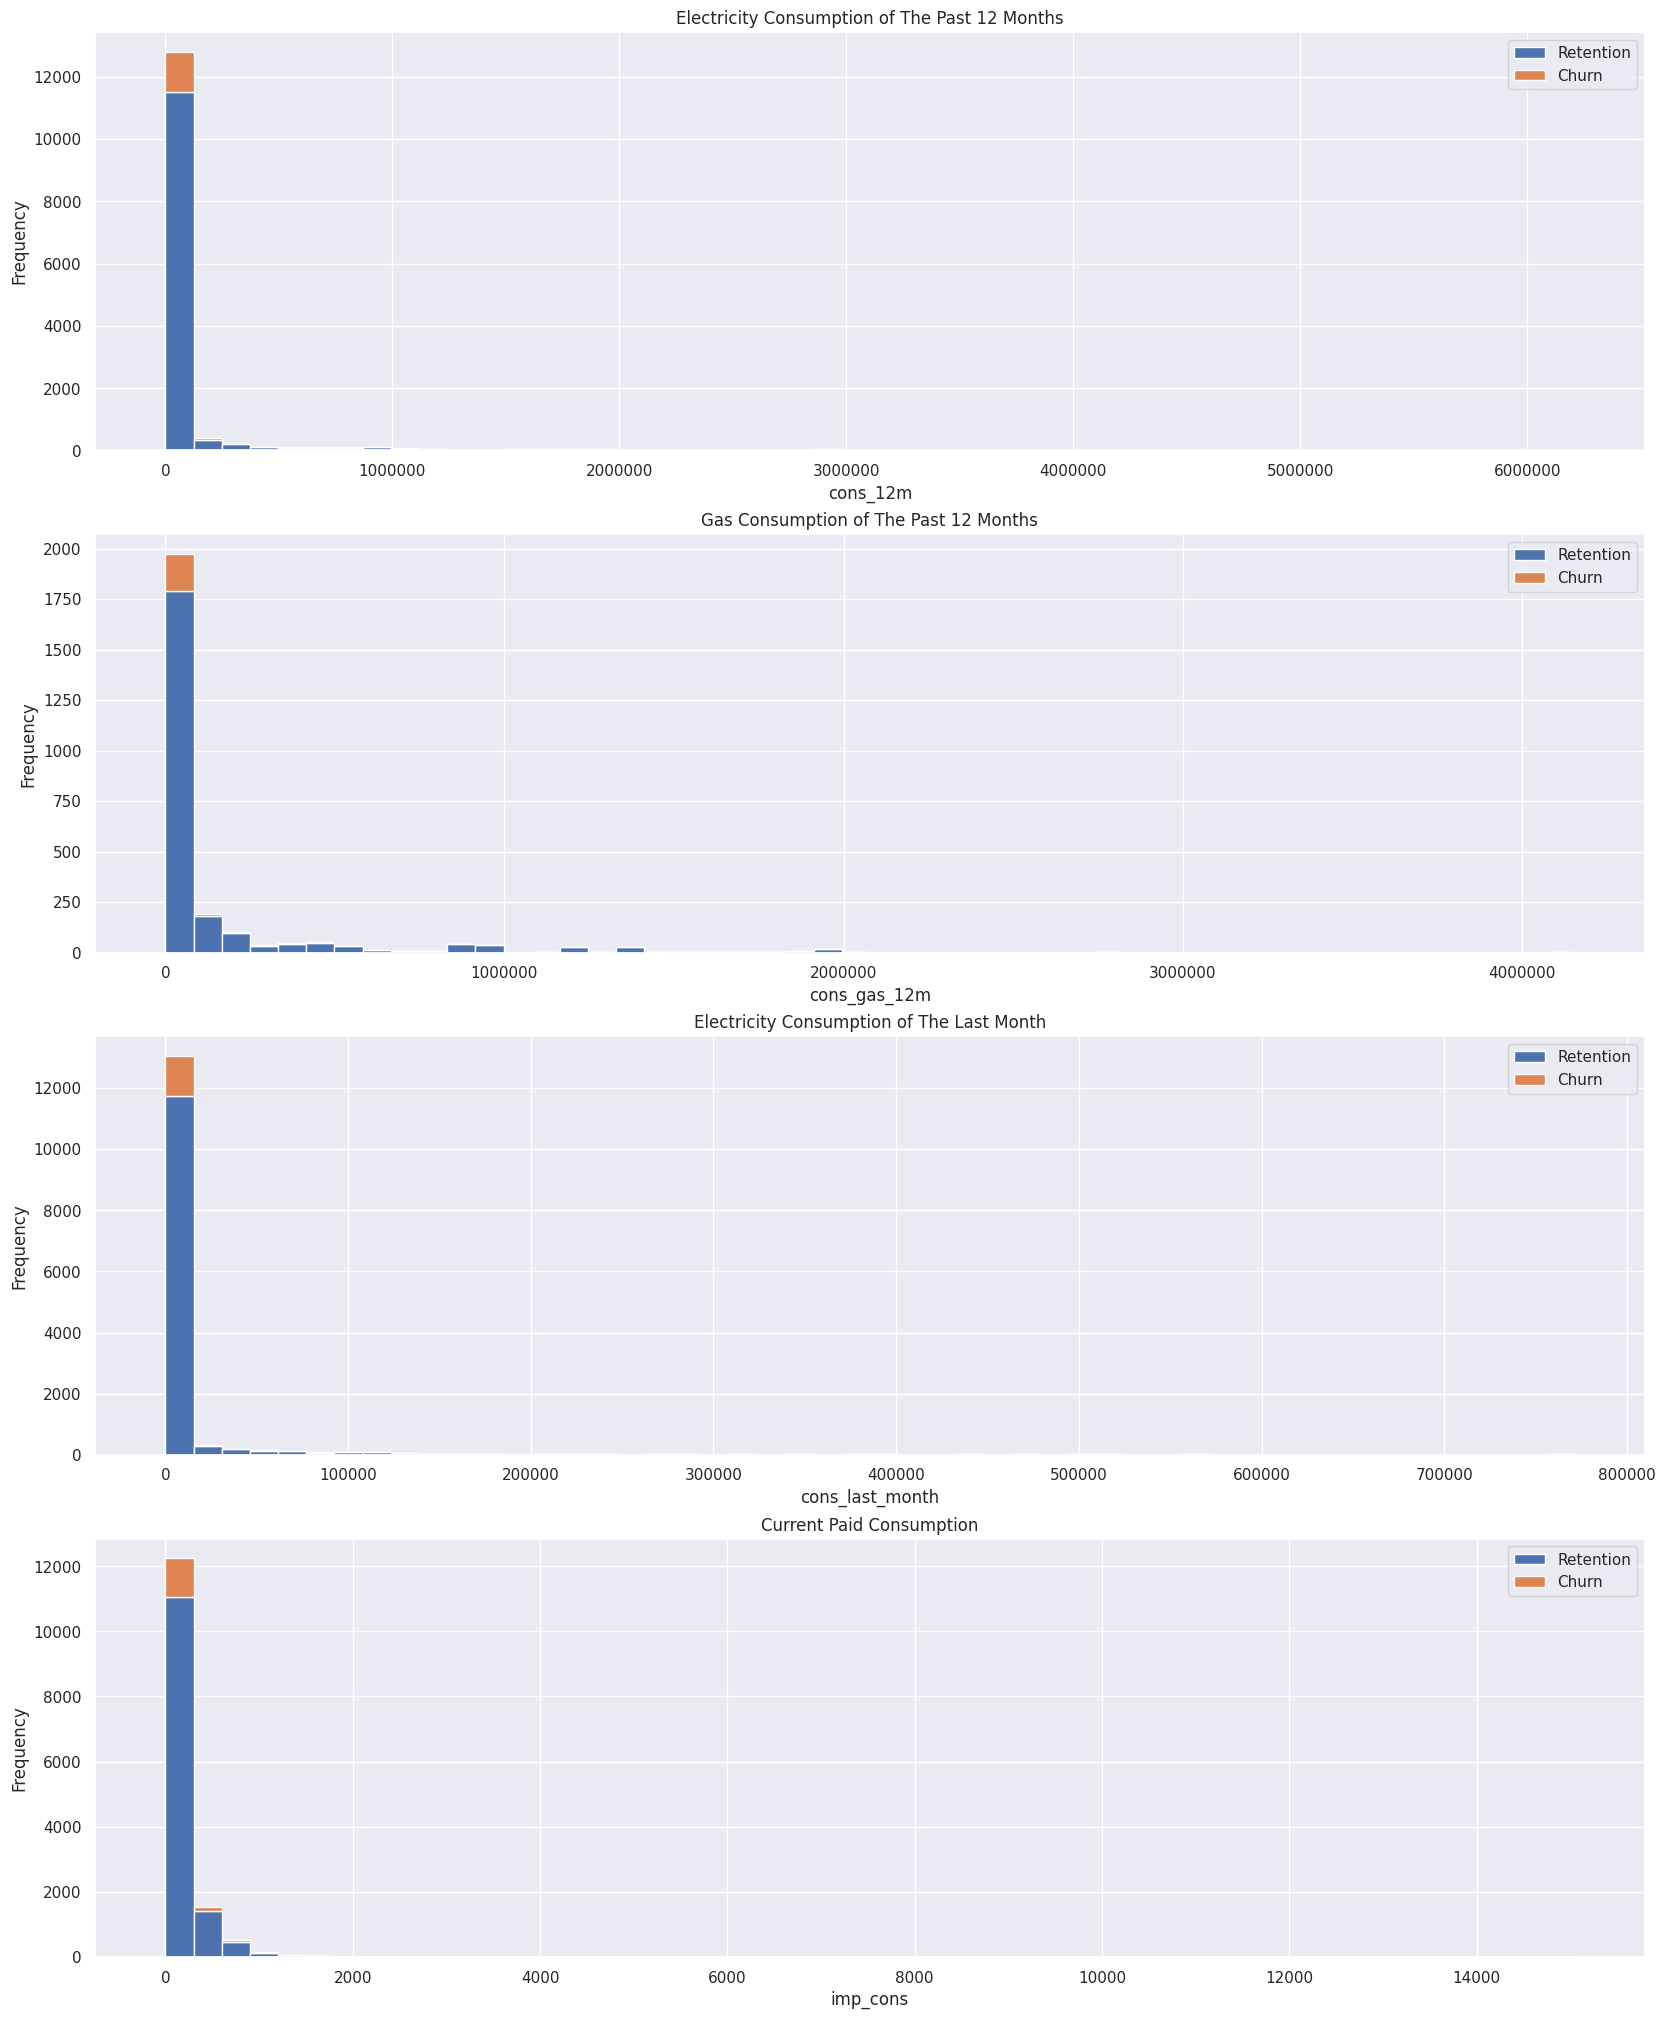

In [22]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=4, figsize=(20, 25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

axs[0].set_title('Electricity Consumption of The Past 12 Months')
axs[1].set_title('Gas Consumption of The Past 12 Months')
axs[2].set_title('Electricity Consumption of The Last Month')
axs[3].set_title('Current Paid Consumption')

plt.show()

##### The consumption data is highly positively skewed, presenting a very long right-tail towards the higher values of the distribution. The values on the higher and lower end of the distribution are likely to be outliers.

We can use boxlot to detect outliers. It can also tell us if our data is symmetrical, how tightly our data is grouped and if/how our data is skewed.

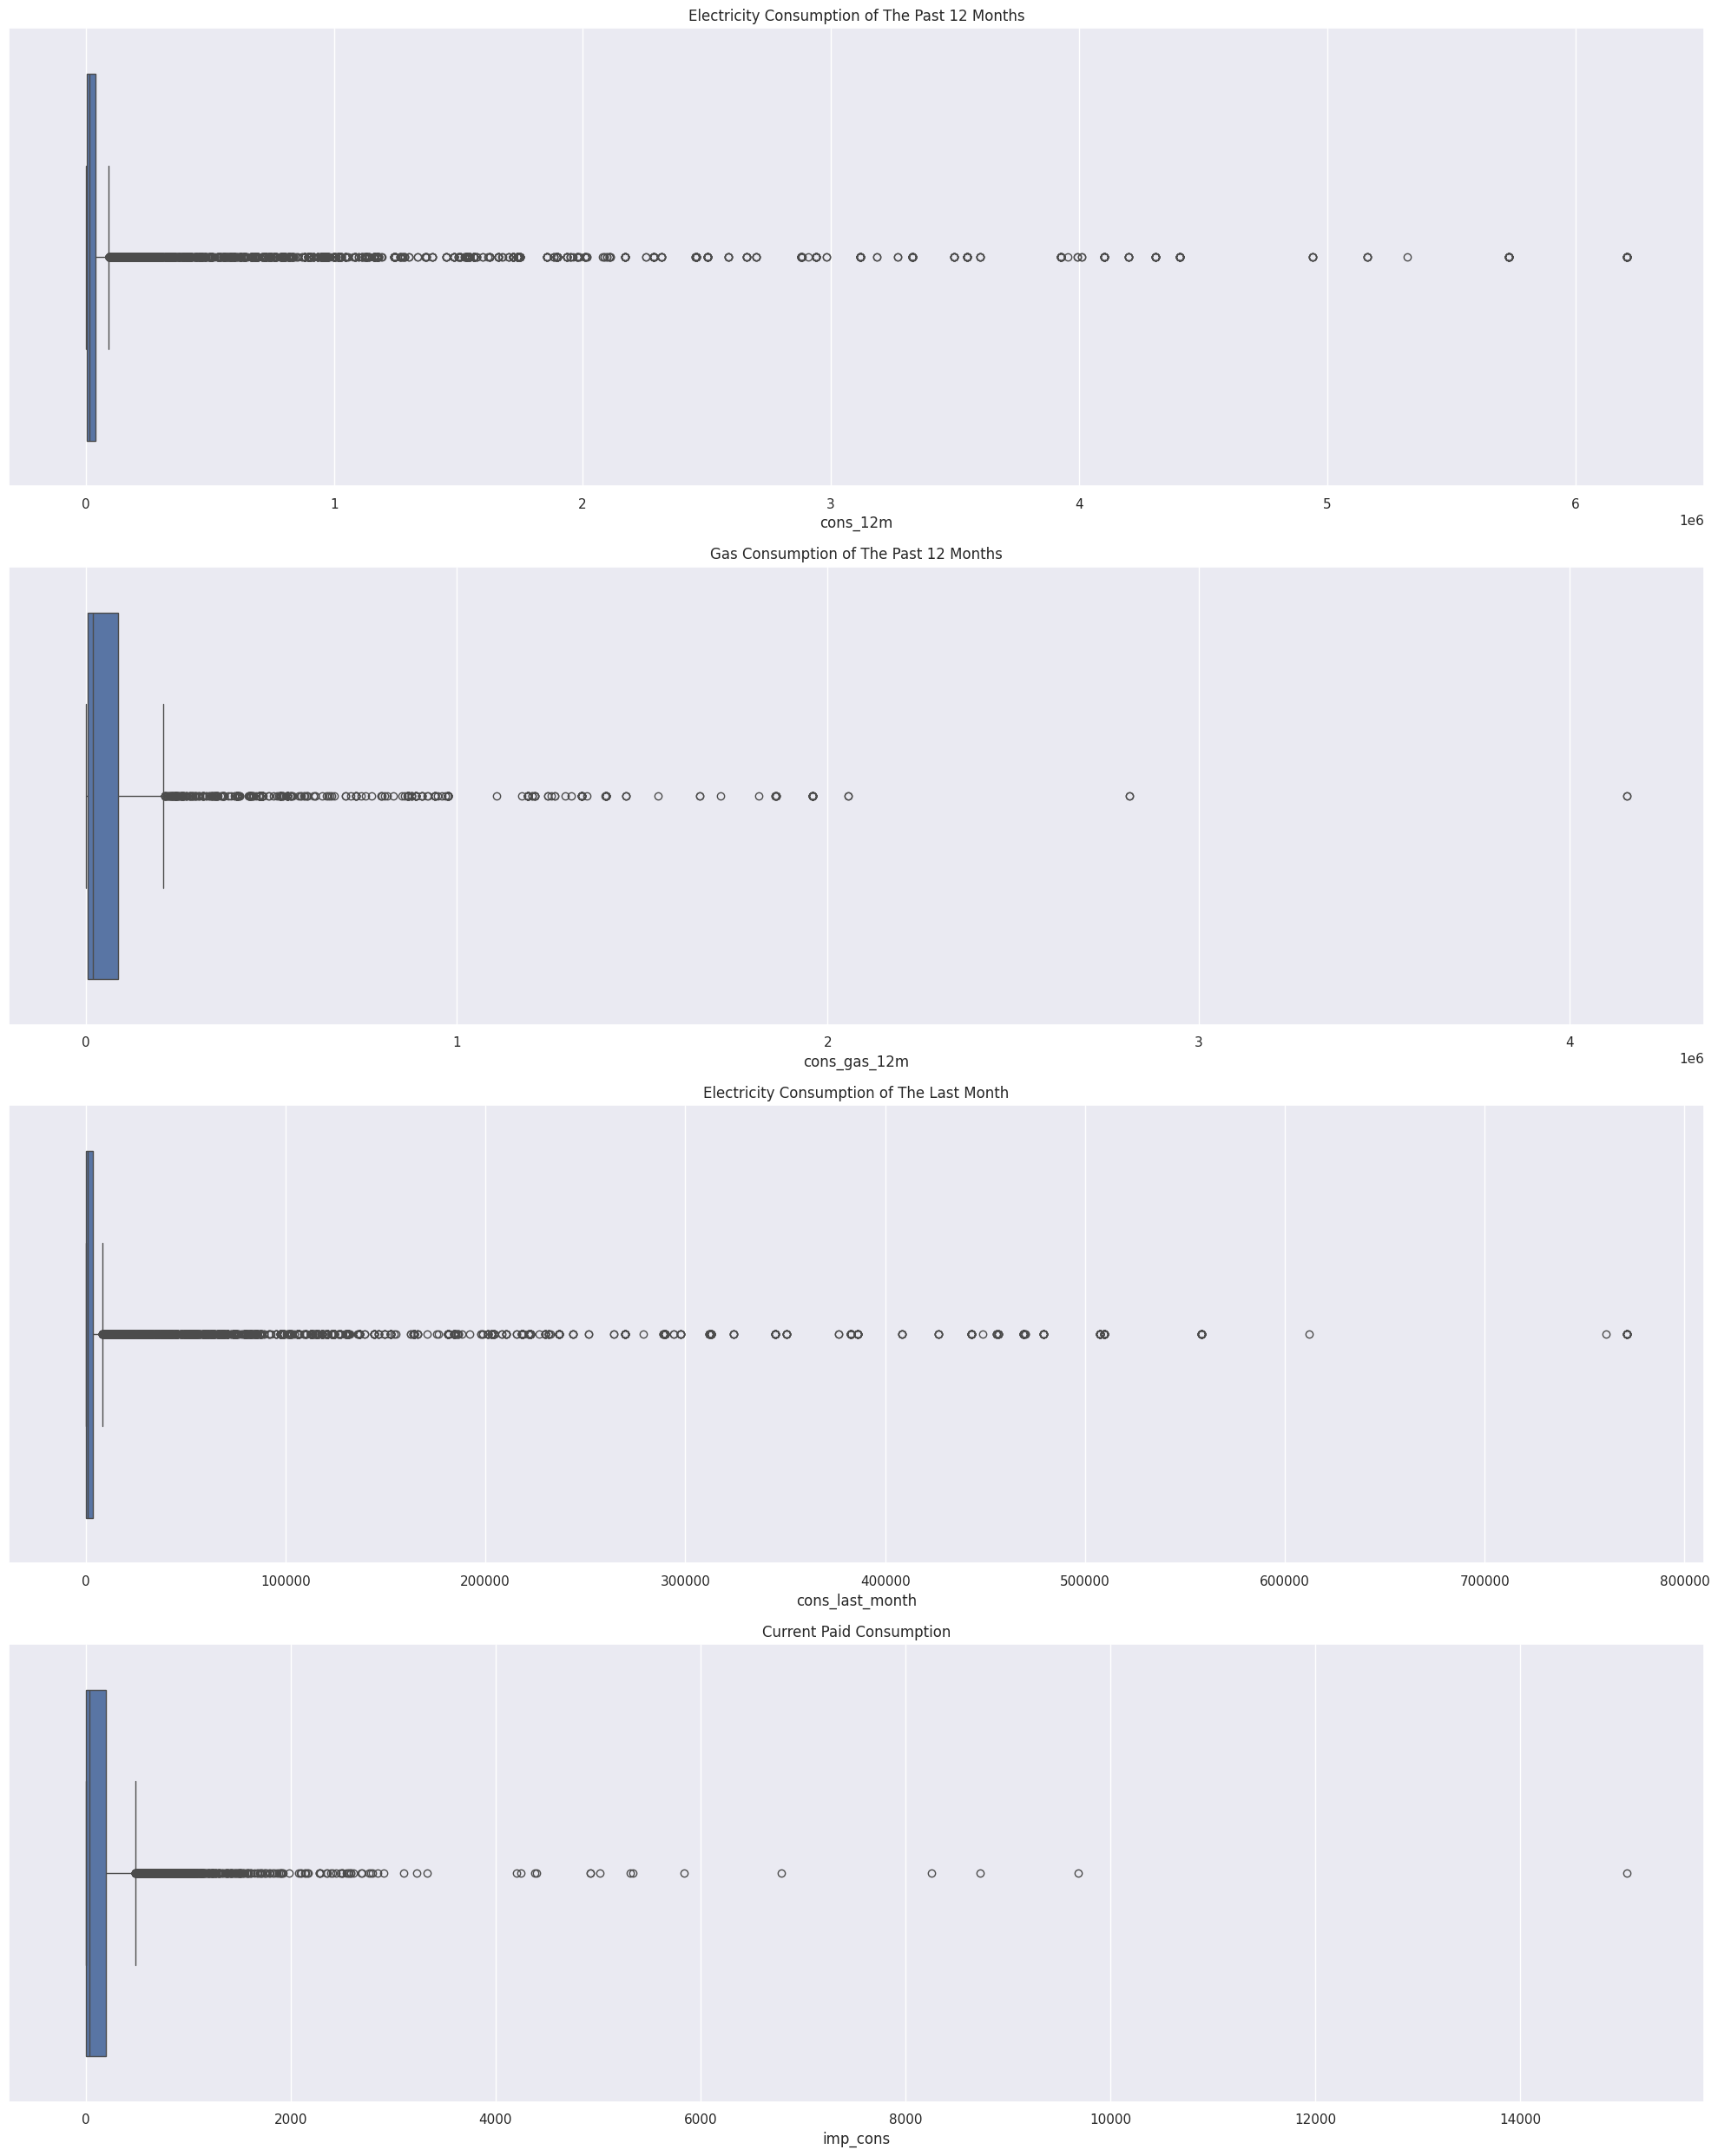

In [23]:
fig, axs = plt.subplots(nrows = 4, figsize = (20,25))

# plot histogram
# Plotting boxplots with horizontal orientation
sns.boxplot(x=consumption['cons_12m'], ax=axs[0], orient='h')
axs[0].set_title('Electricity Consumption of The Past 12 Months')

sns.boxplot(x=consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[1], orient='h')
axs[1].set_title('Gas Consumption of The Past 12 Months')

sns.boxplot(x=consumption["cons_last_month"], ax=axs[2], orient='h')
axs[2].set_title('Electricity Consumption of The Last Month')

sns.boxplot(x=consumption["imp_cons"], ax=axs[3], orient='h')
axs[3].set_title('Current Paid Consumption')

# Adjusting layout to prevent overlap
plt.tight_layout()
plt.show()


##### We will deal with skewness and outliers during feature engineering.
Explore other columns' feature.

#### Forecast

In [24]:
forecast = client_df[
    ["id", "forecast_cons_12m", "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak","churn"]
    ]

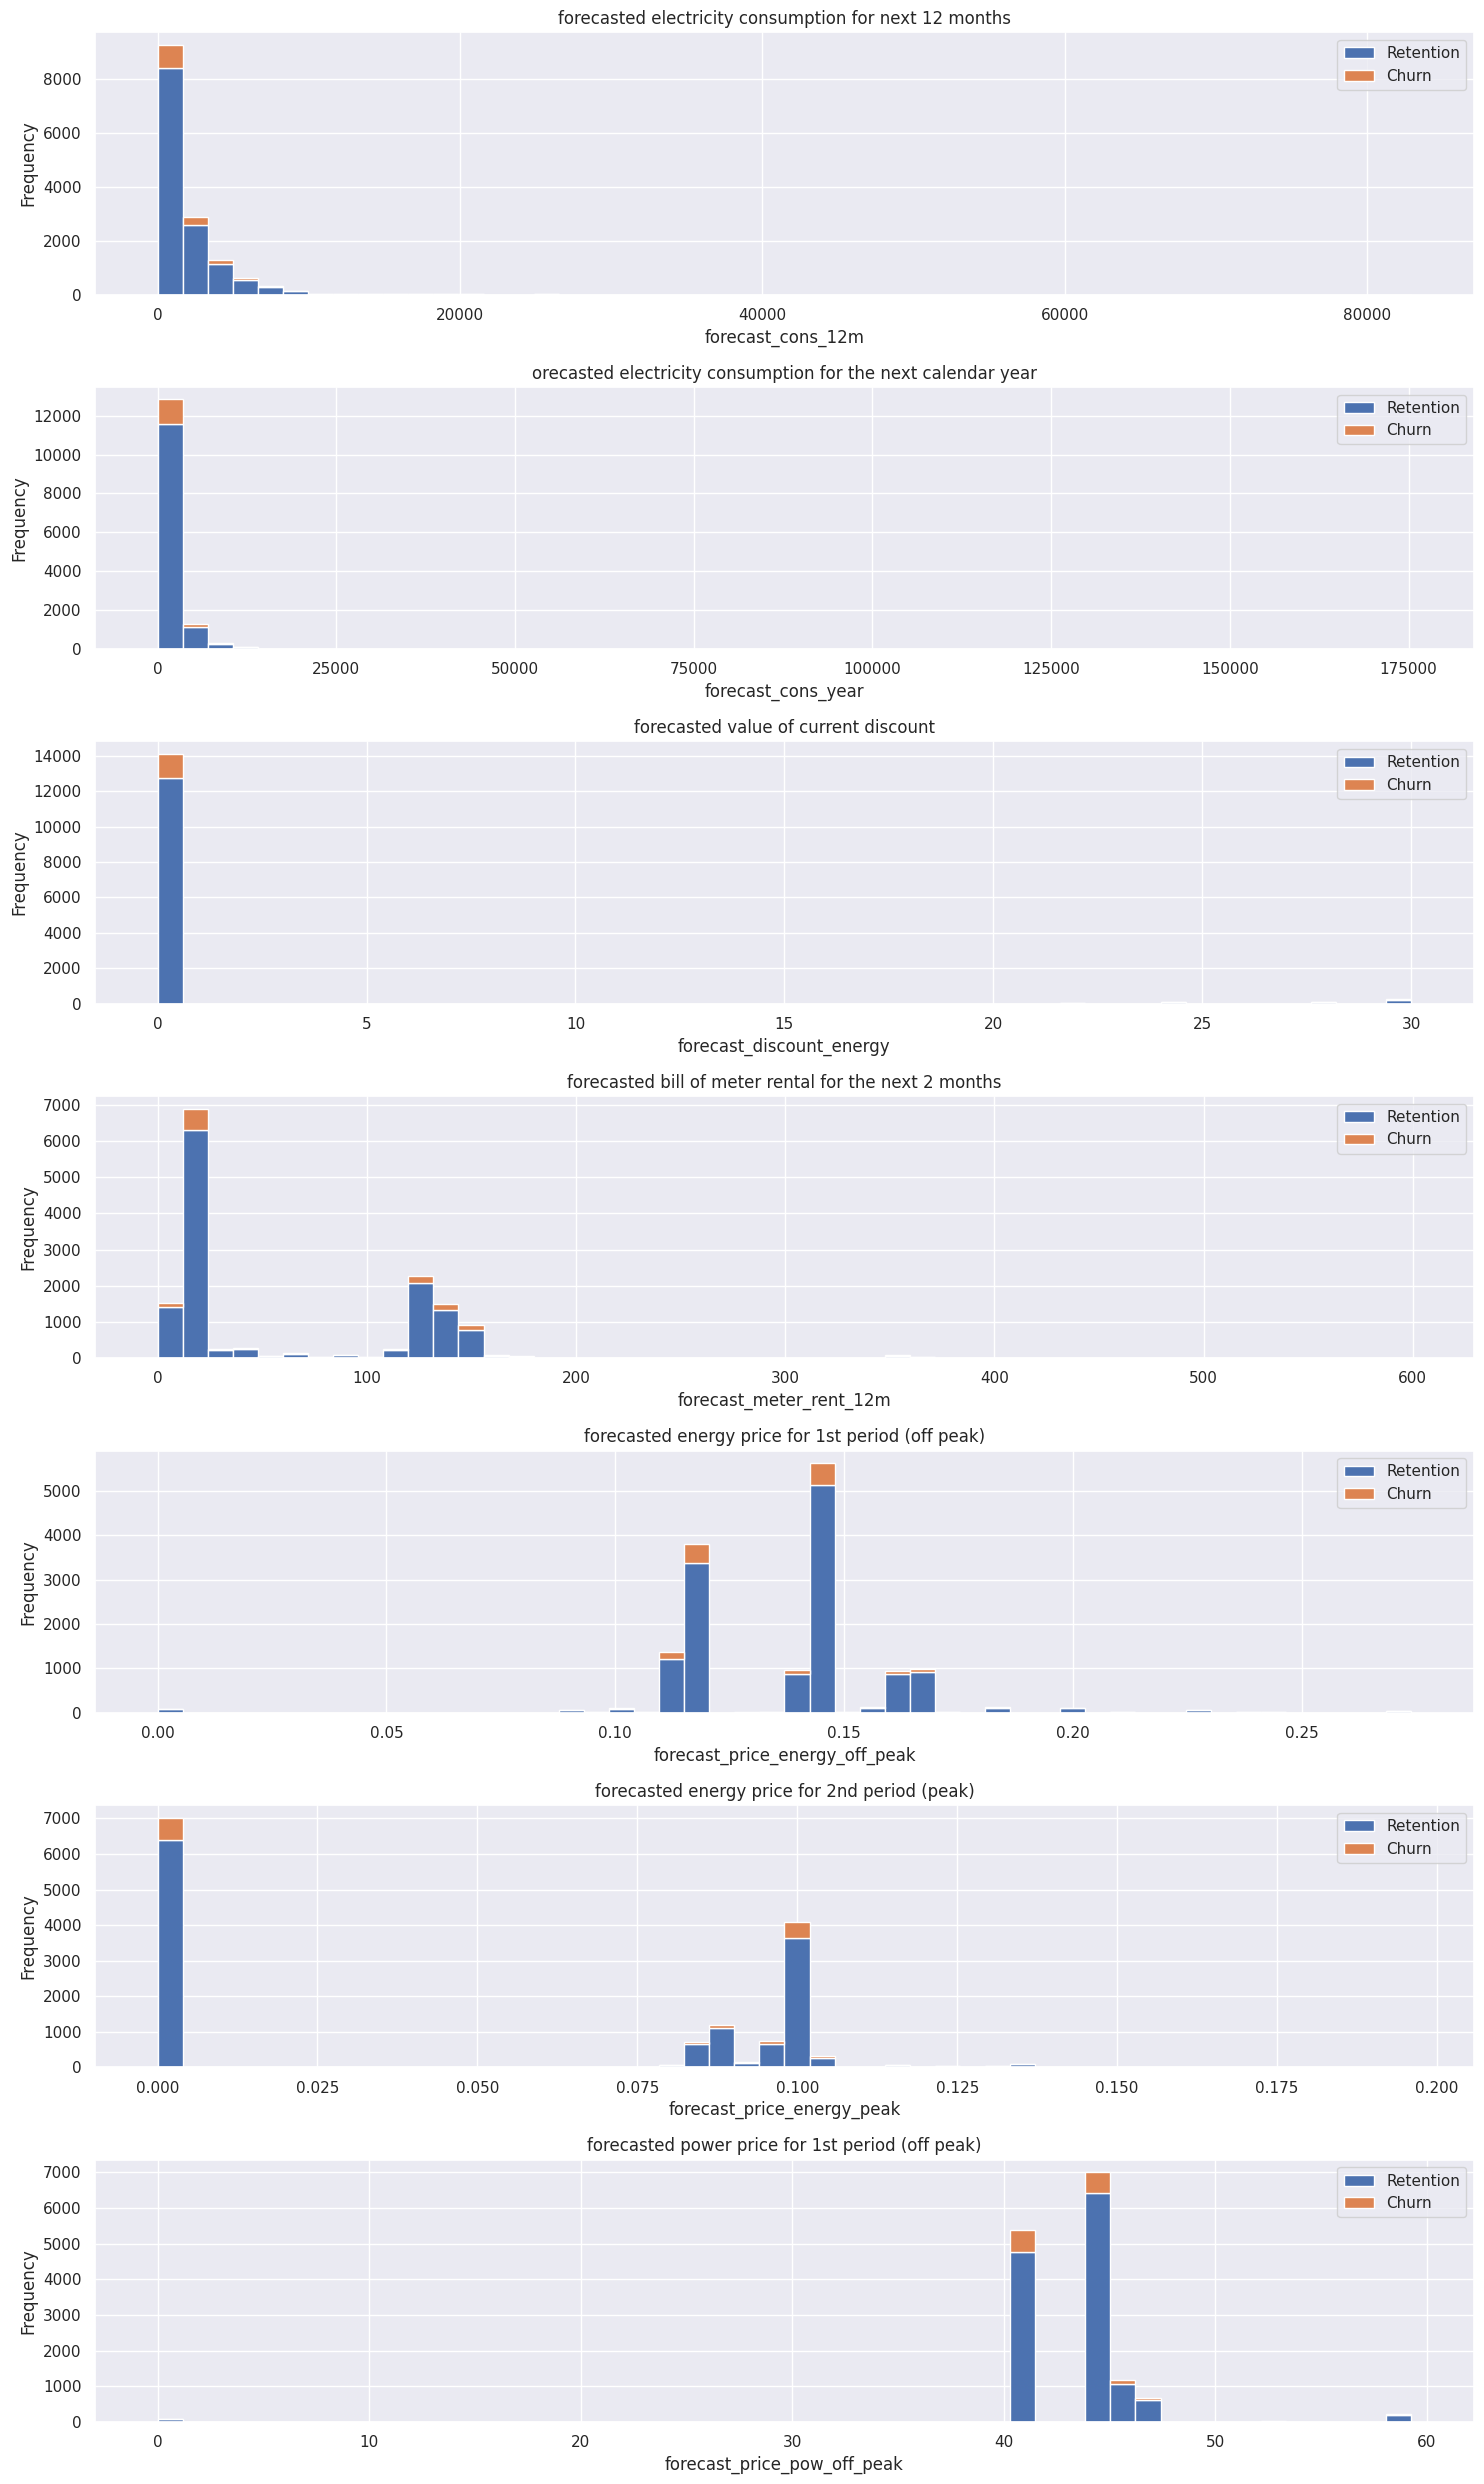

In [25]:
fig, axs = plt.subplots(nrows=7, figsize=(15,25))

# Plot histogram
plot_distribution(client_df, "forecast_cons_12m", axs[0])
plot_distribution(client_df, "forecast_cons_year", axs[1])
plot_distribution(client_df, "forecast_discount_energy", axs[2])
plot_distribution(client_df, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_df, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client_df, "forecast_price_energy_peak", axs[5])
plot_distribution(client_df, "forecast_price_pow_off_peak", axs[6])

axs[0].set_title('forecasted electricity consumption for next 12 months')
axs[1].set_title('orecasted electricity consumption for the next calendar year')
axs[2].set_title('forecasted value of current discount')
axs[3].set_title('forecasted bill of meter rental for the next 2 months')
axs[4].set_title('forecasted energy price for 1st period (off peak)')
axs[5].set_title('forecasted energy price for 2nd period (peak)')
axs[6].set_title('forecasted power price for 1st period (off peak)')

plt.tight_layout()
plt.show()

##### Similarly to the consumption plots, we can observe that a lot of the variables are highly positively skewed, creating a very long tail for the higher values. We will make some transformations during the next exercise to correct for this skewness.

#### Non-numerical Variables Analysis

##### As we specifically want to analyze the customer churn issue, let's see customer churning status: There are nearly 10% customer churn rate.

In [26]:
# The first function plot_stacked_bars is used to plot a stacked bar chart.
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

# The second function annotate_bars is used by the first function
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:

        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

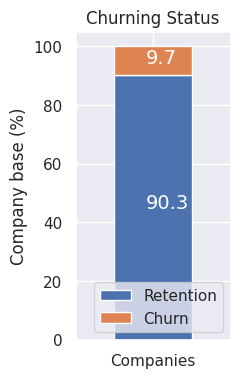

In [27]:
# customer churn issue
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning Status", (2, 4), legend_="lower right")

##### Churn rate with Sales Channel

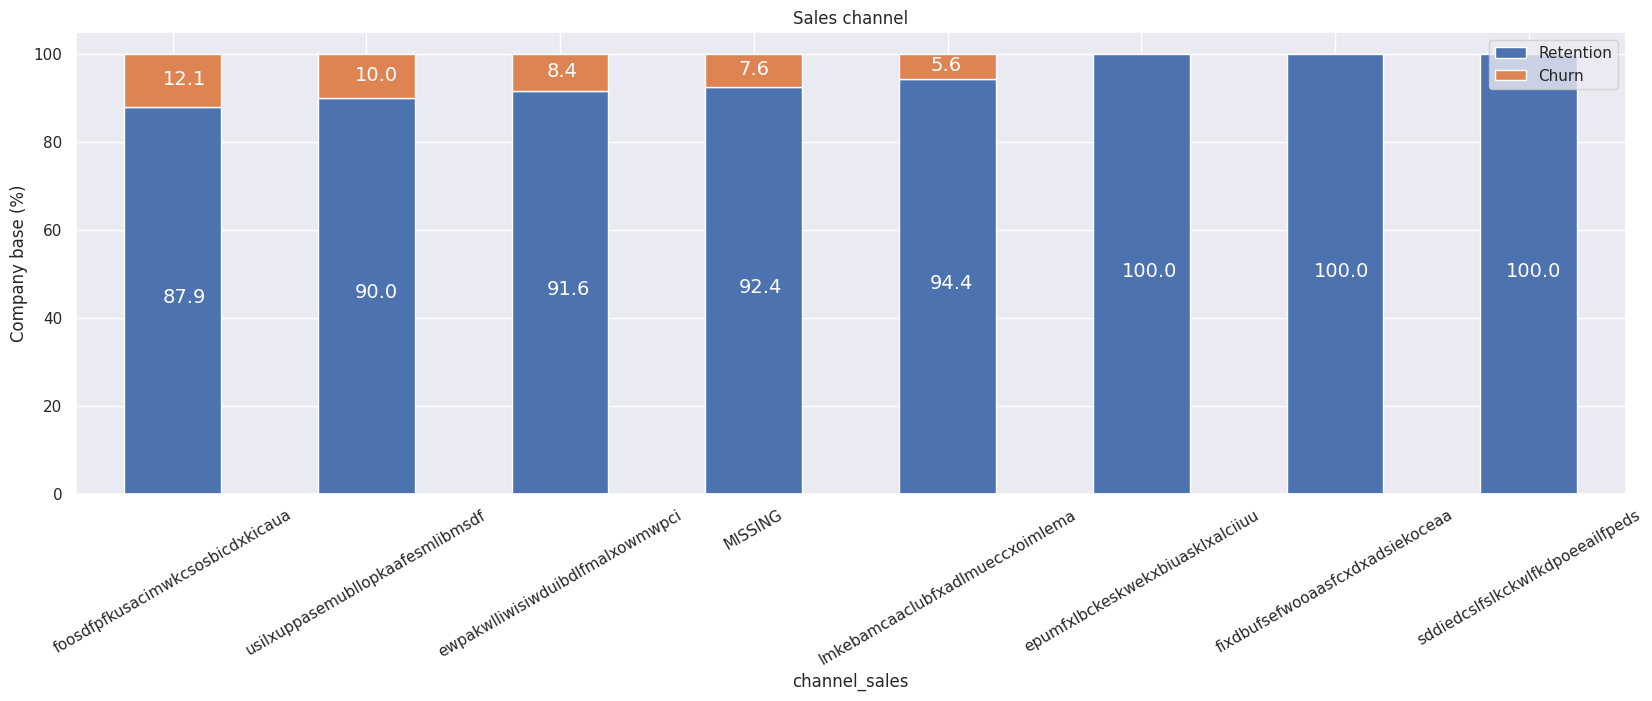

In [28]:
# Calculate churn counts by sales channel
channel = client_df[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level = 1).fillna(0)
channel_churn = (channel.div(channel.sum(axis = 1), axis=0) * 100).sort_values(by = [1], ascending = False)

plot_stacked_bars(channel_churn, 'Sales channel', (20, 6),rot_=30)

##### The sale channel 'foodsdfp....' has the highest churn rate. Interestingly, the churning customers are distributed over 5 different values for channel_sales. As well as this, the value of MISSING has a churn rate of 7.6%.

#### Contract Type

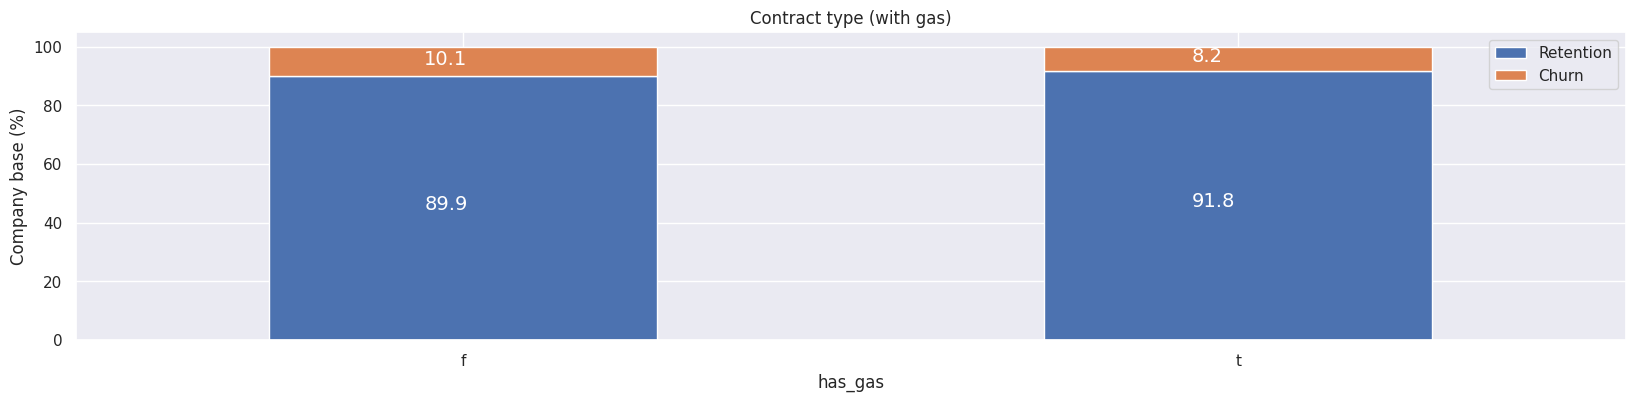

In [31]:
contract_type = client_df[['id', 'has_gas', 'churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

plot_stacked_bars(contract_percentage, 'Contract type (with gas)', (20, 4))

#### Subscribed Power & Power Suscription

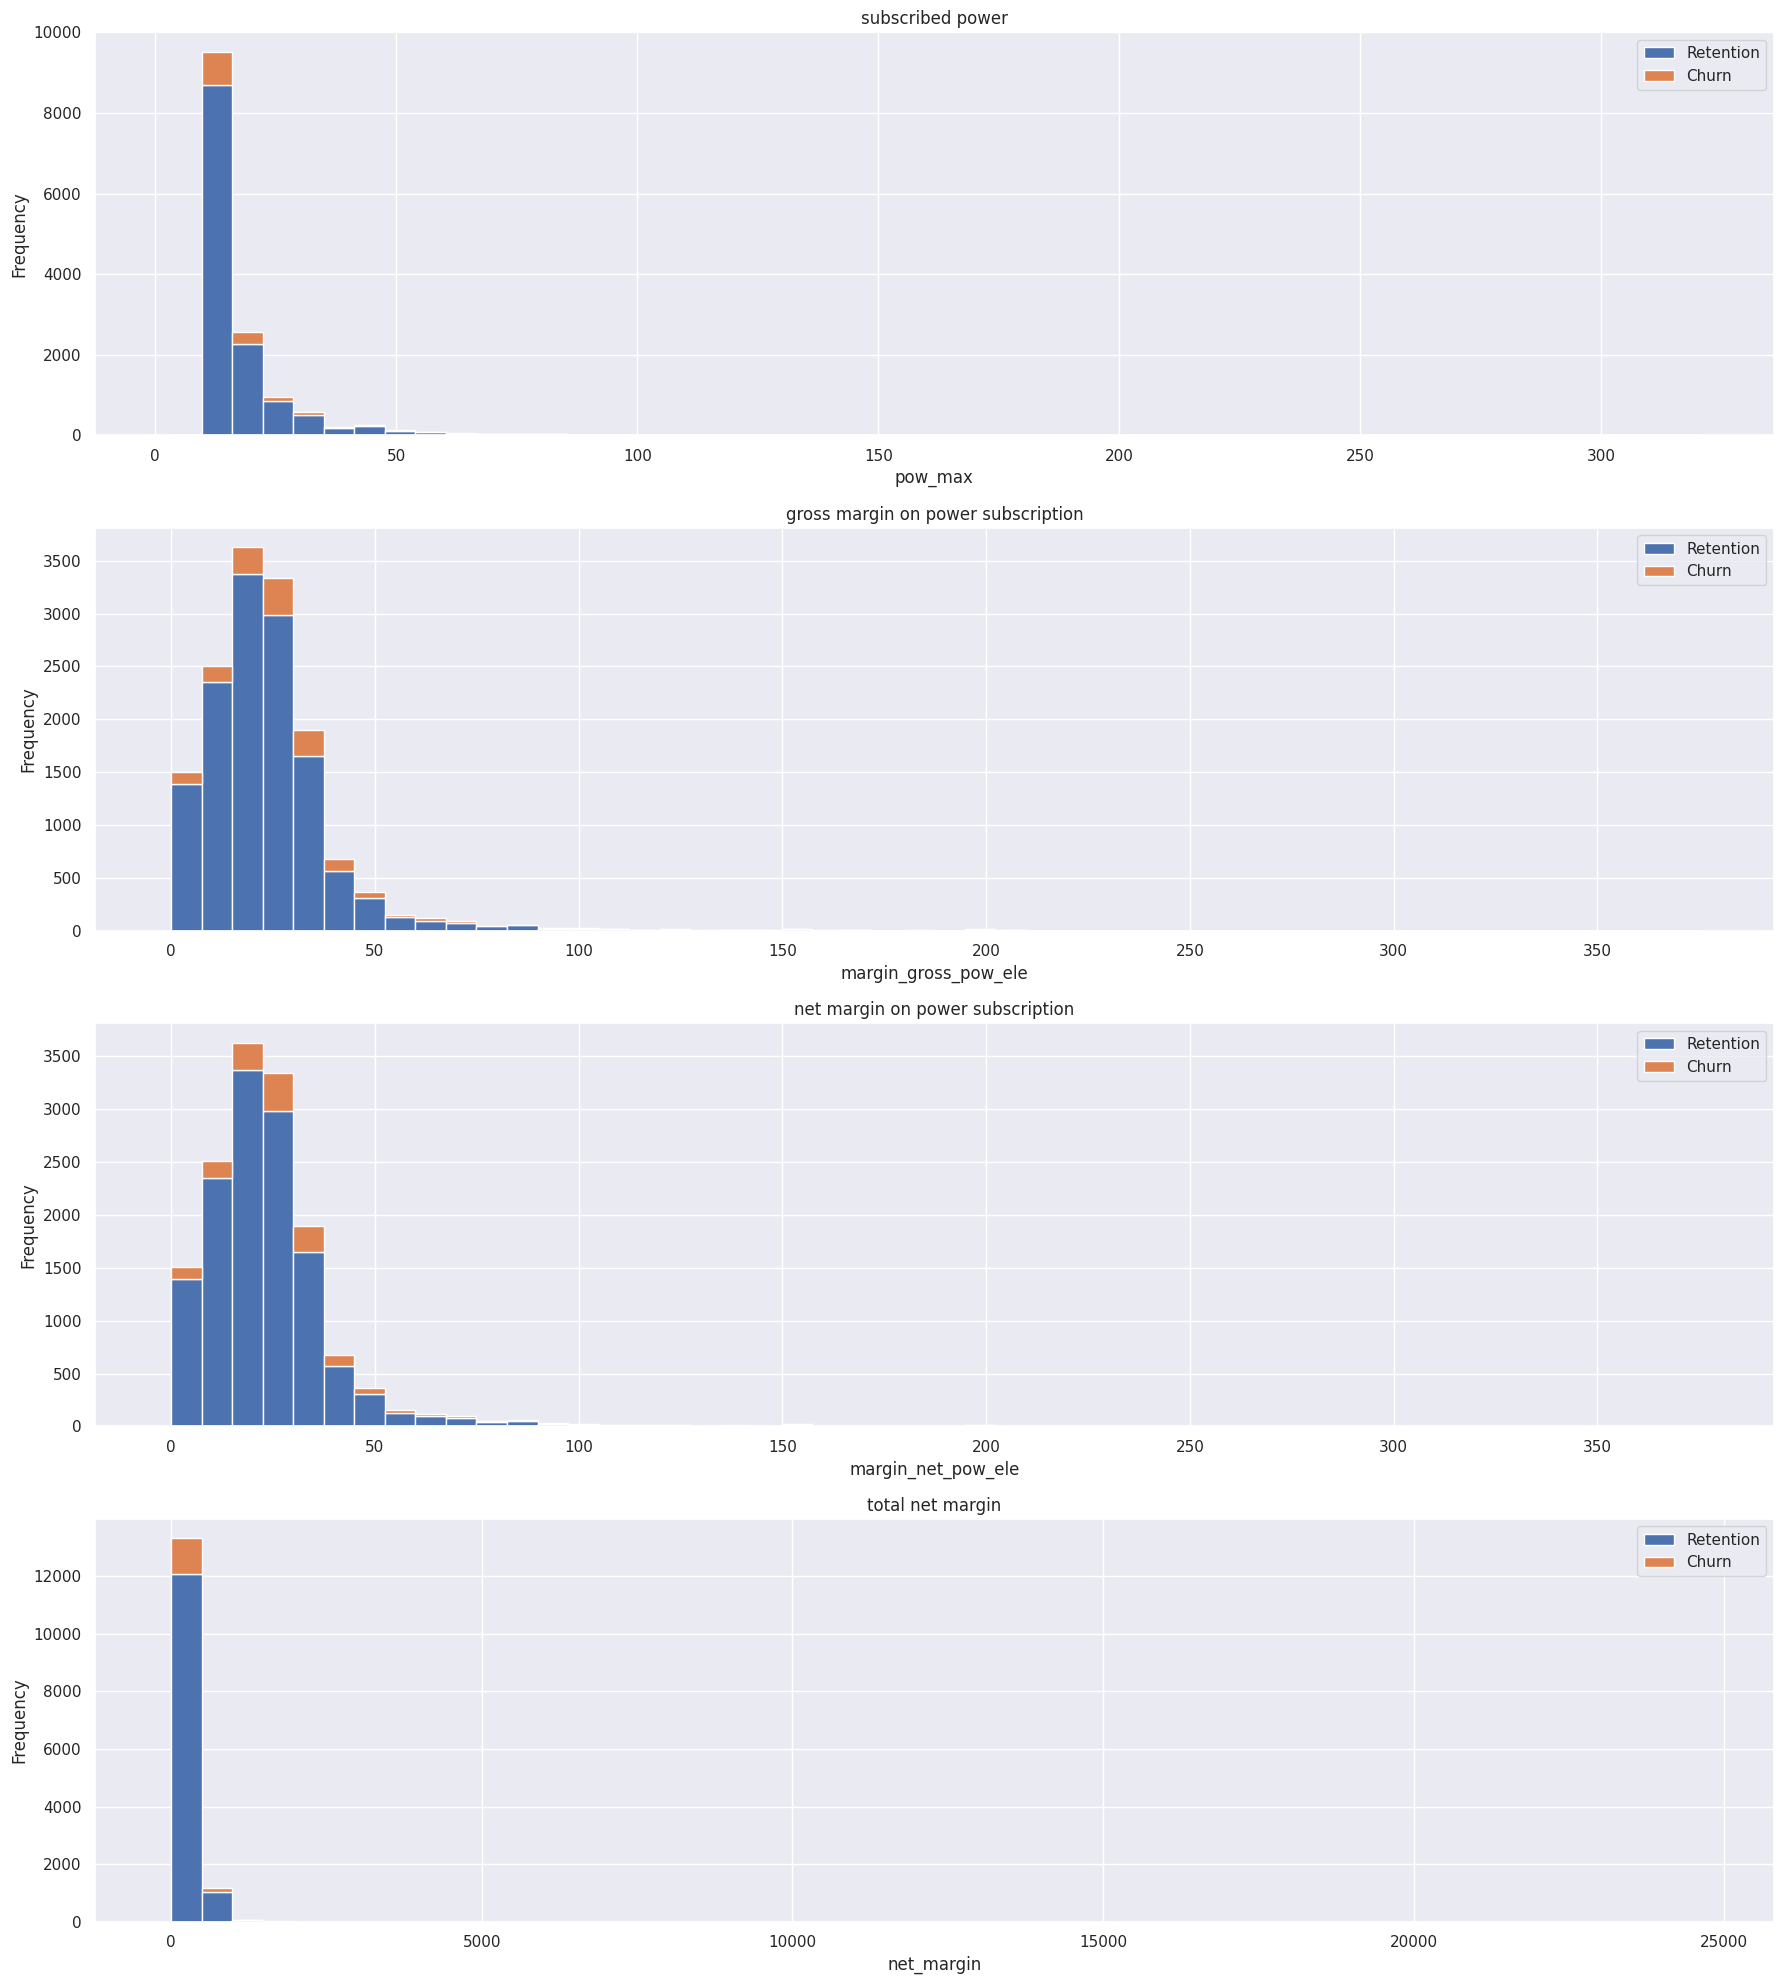

In [50]:
power = client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max', 'churn']]

fig, axs = plt.subplots(nrows=4, figsize=(18, 20))
plot_distribution(power, 'pow_max', axs[0])
plot_distribution(power, 'margin_gross_pow_ele', axs[1])
plot_distribution(power, 'margin_net_pow_ele', axs[2])
plot_distribution(power, 'net_margin', axs[3])

axs[0].set_title('subscribed power')
axs[1].set_title('gross margin on power subscription')
axs[2].set_title('net margin on power subscription')
axs[3].set_title('total net margin')

plt.tight_layout()
plt.show()

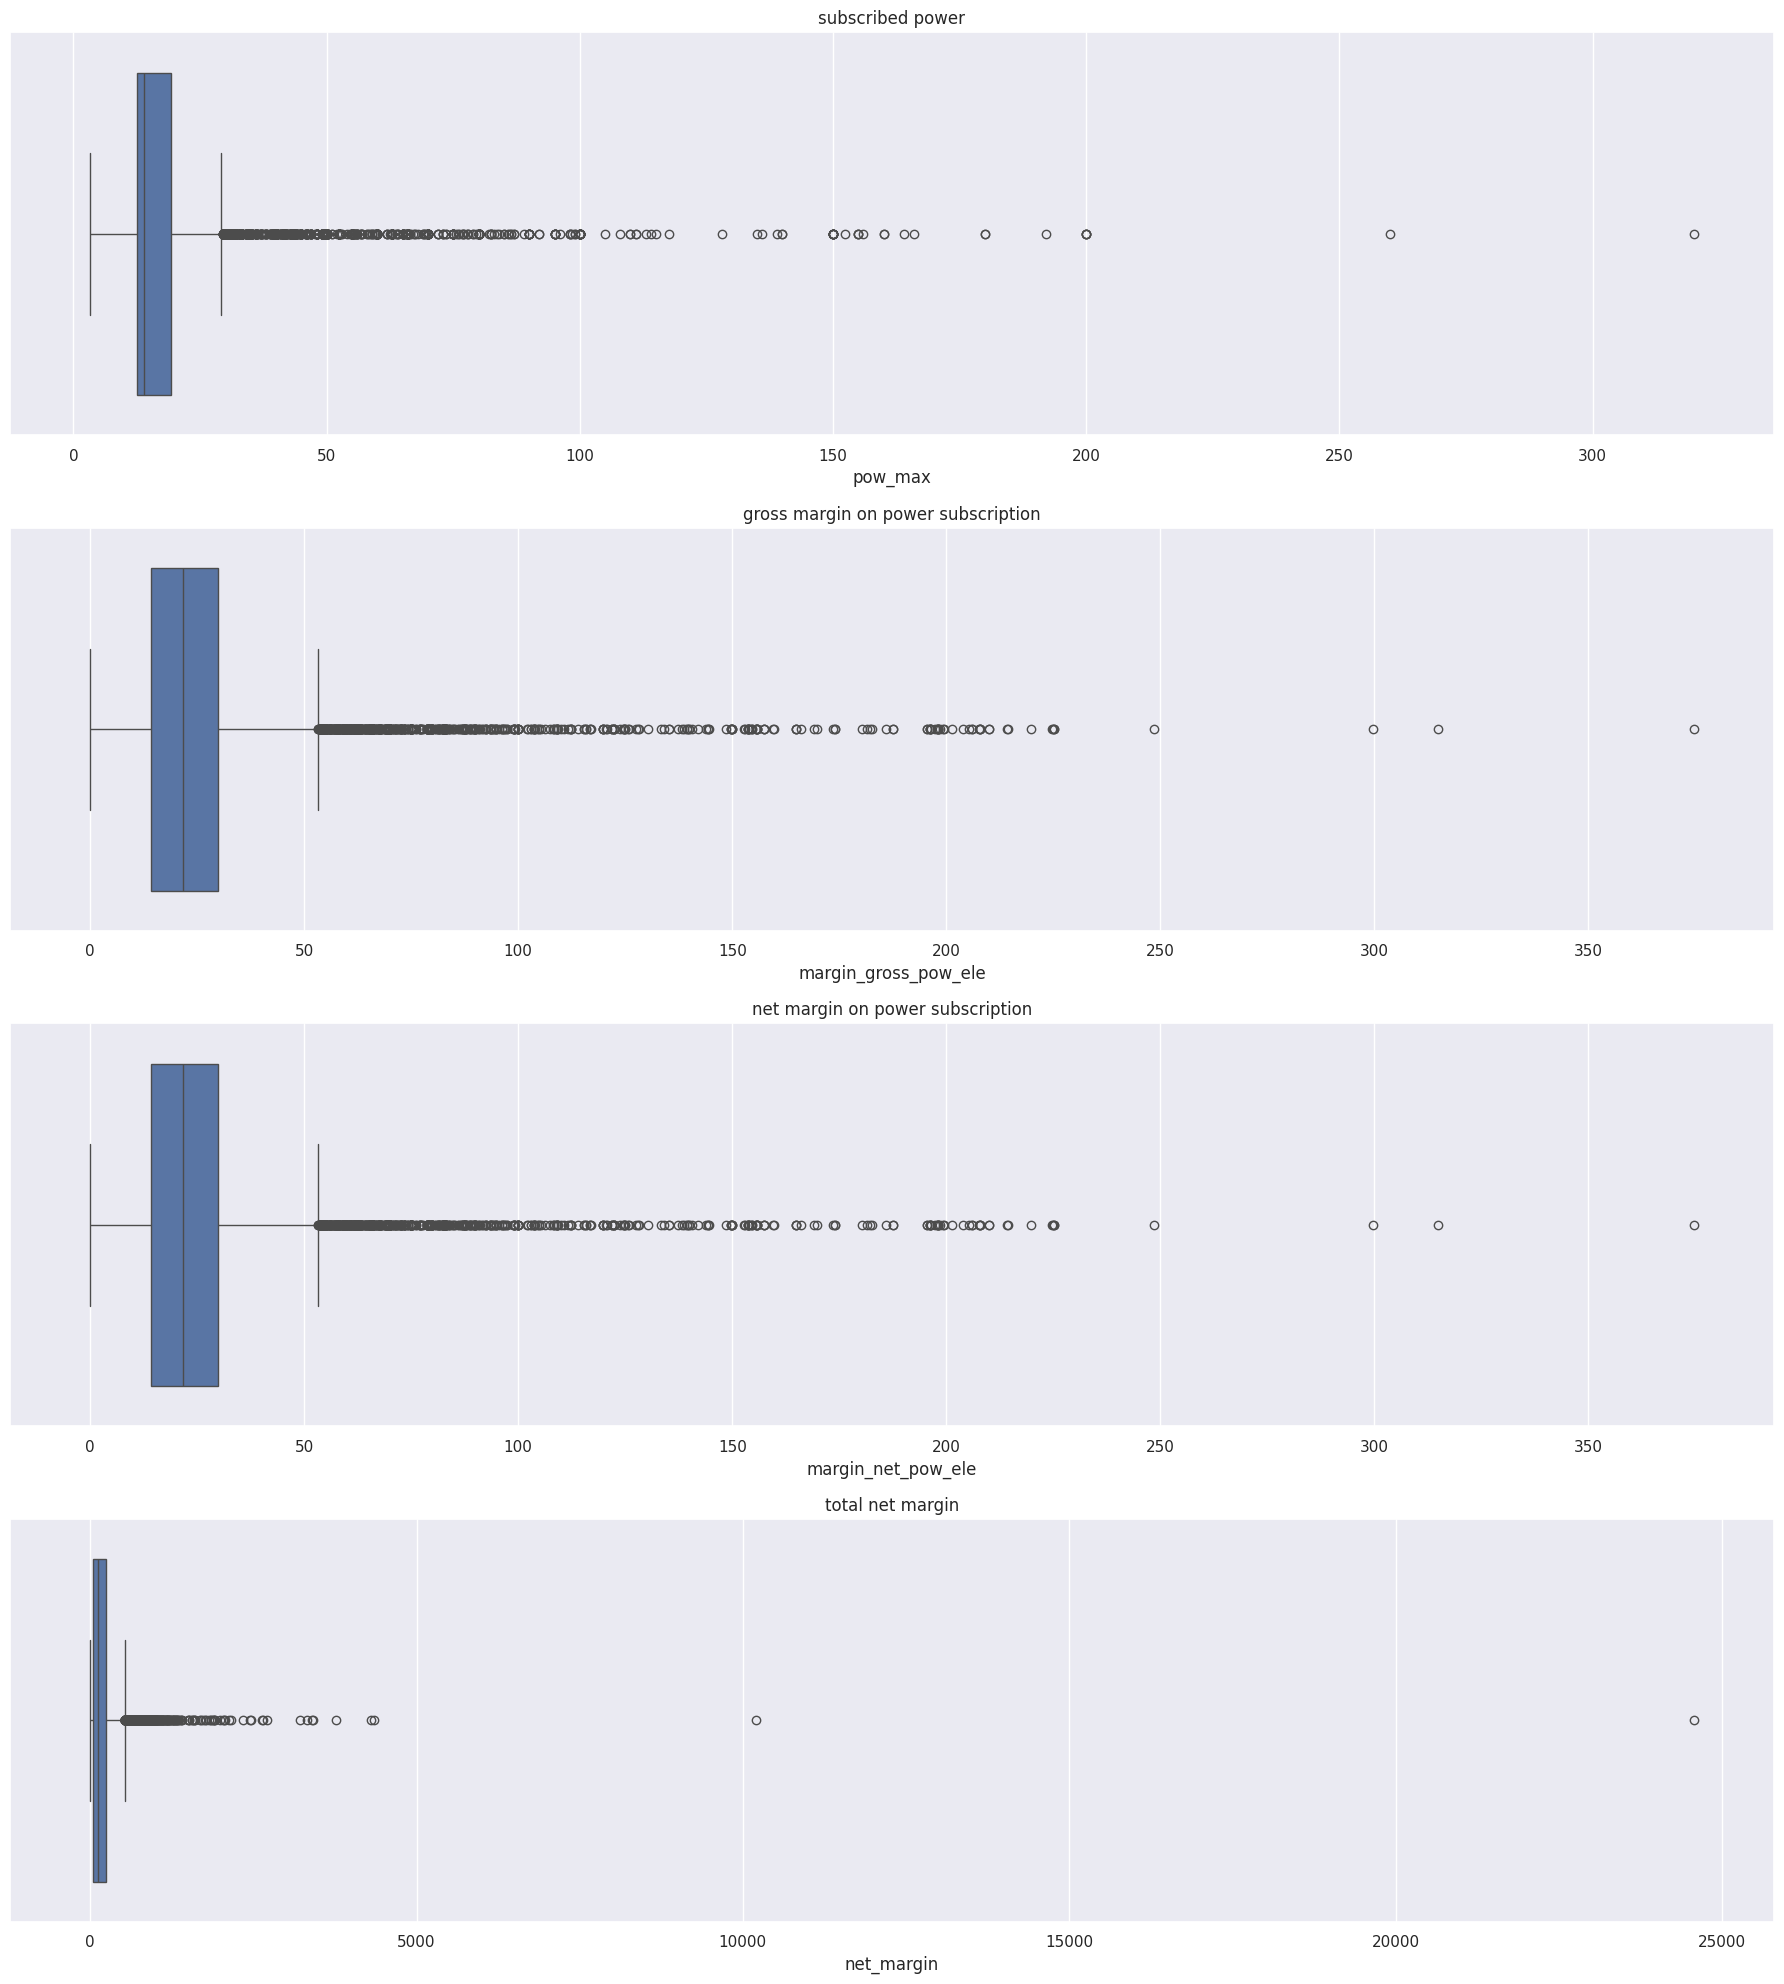

In [33]:
# plot boxplot
fig, axs = plt.subplots(nrows=4, figsize=(18,20))
sns.boxplot(margin["pow_max"], ax=axs[0] ,orient='h')
sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[1] ,orient='h')
sns.boxplot(margin["margin_net_pow_ele"],ax=axs[2] ,orient='h')
sns.boxplot(margin["net_margin"], ax=axs[3] ,orient='h')

axs[0].set_title('subscribed power')
axs[1].set_title('gross margin on power subscription')
axs[2].set_title('net margin on power subscription')
axs[3].set_title('total net margin')

plt.tight_layout()
plt.show()

##### We can see some sknewness and outliers here, we will deal with them later.

#### Other columns

In [34]:
others = client_df[['id','nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]

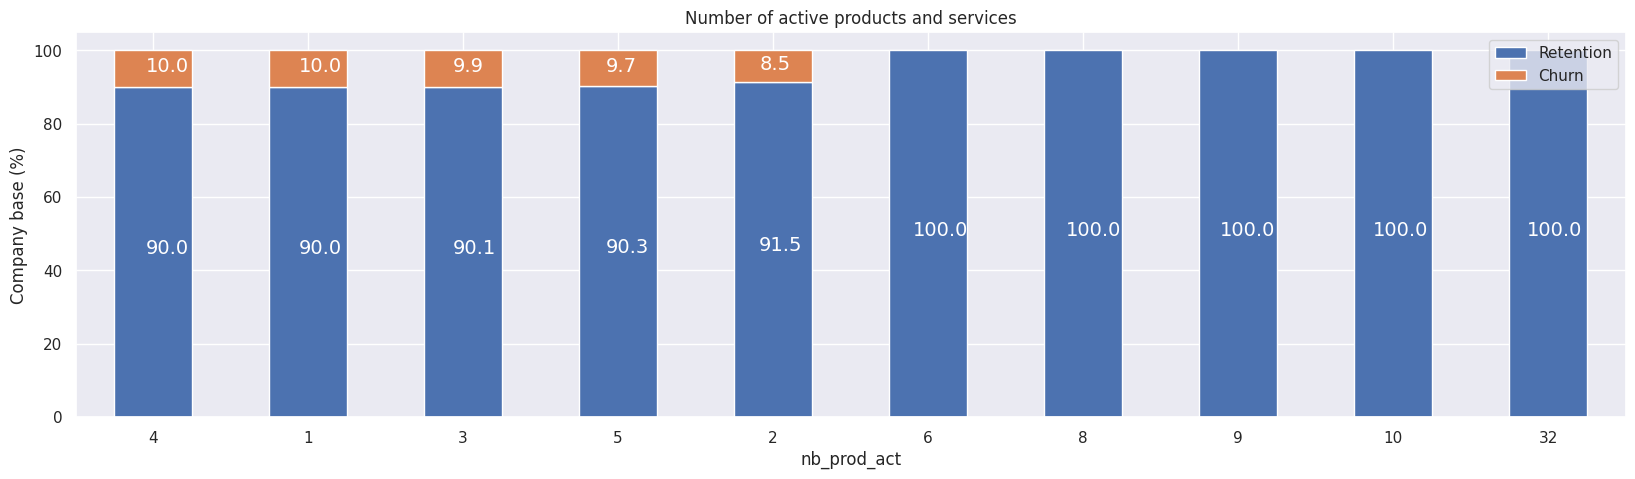

In [35]:
prod = others.groupby([others['nb_prod_act'], others['churn']])['id'].count().unstack(level=1)
prod_percentage = (prod.div(prod.sum(axis=1), axis=0) *100).sort_values(by=[1], ascending=False)
plot_stacked_bars(prod_percentage, "Number of active products and services", (20, 5))

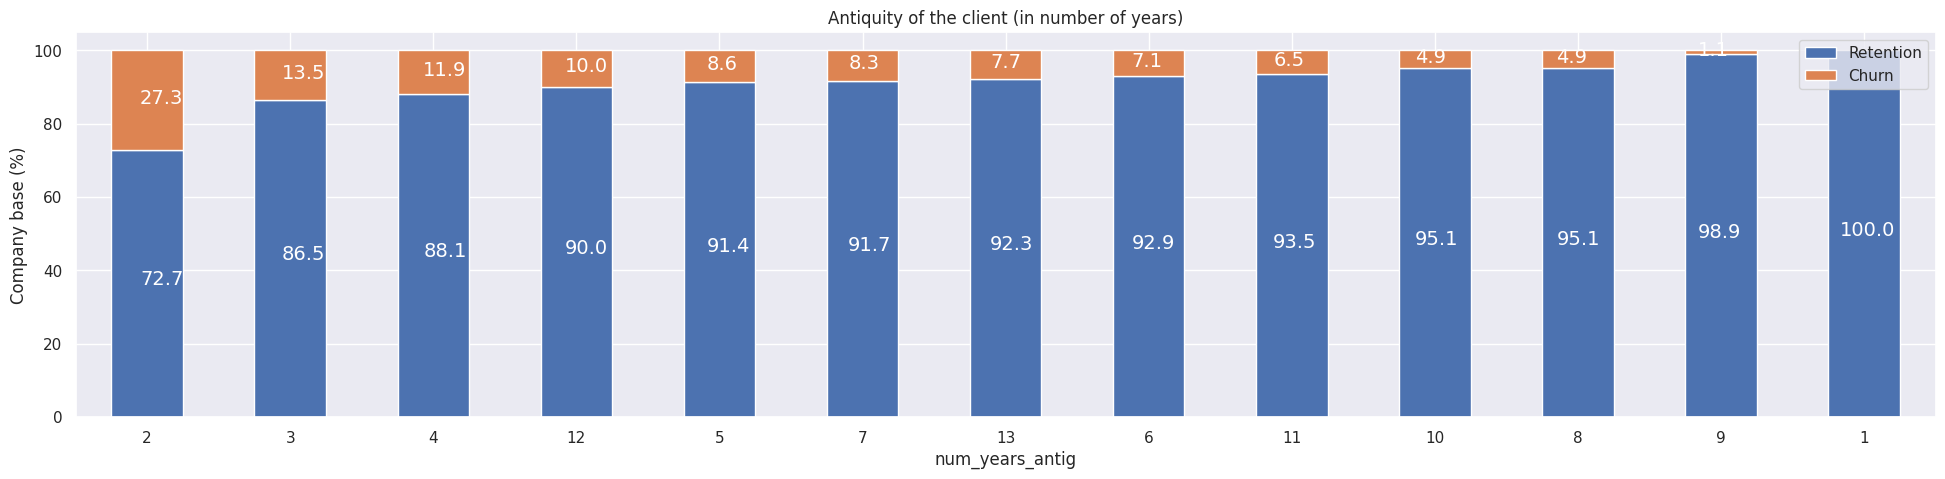

In [36]:
antig = others.groupby([others['num_years_antig'], others['churn']])['id'].count().unstack(level=1)
antig_percentage = (antig.div(antig.sum(axis=1), axis=0) *100).sort_values(by=[1], ascending=False)
plot_stacked_bars(antig_percentage, 'Antiquity of the client (in number of years)', (24,5))

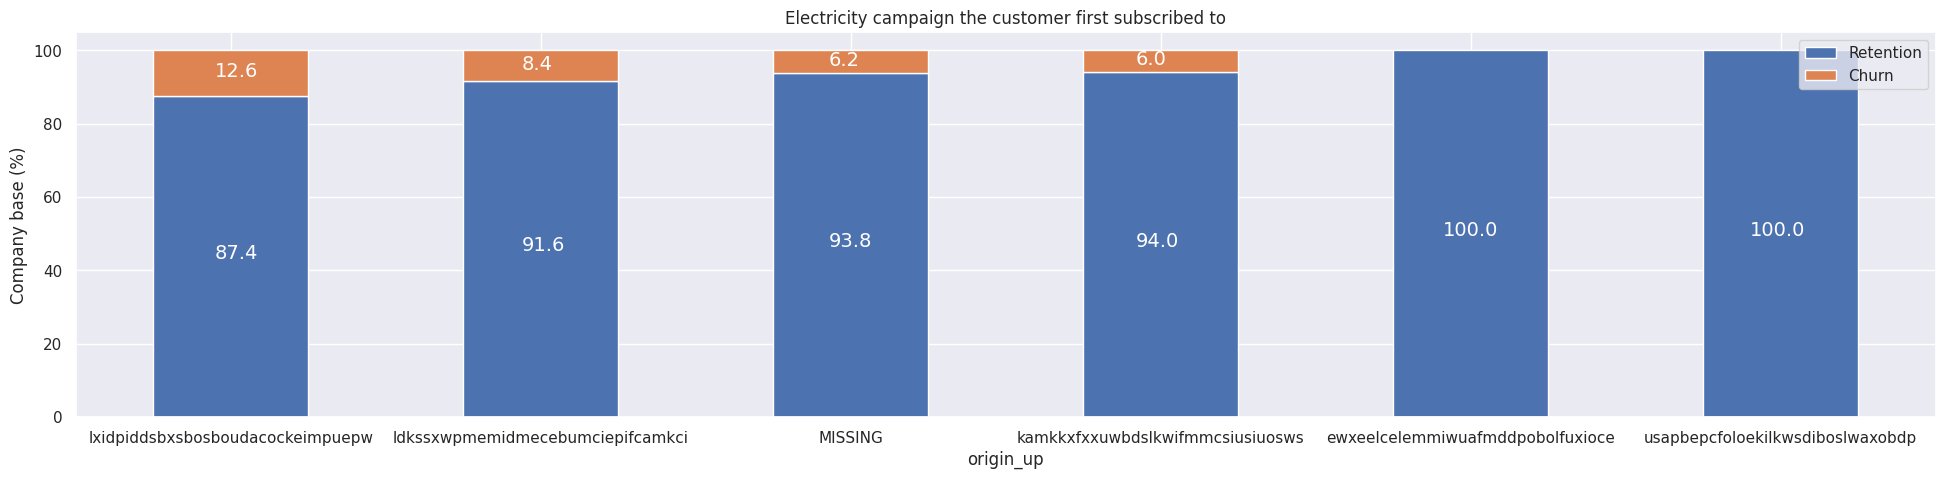

In [37]:
origin = others.groupby([others['origin_up'], others['churn']])['id'].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0) *100).sort_values(by = [1], ascending=False)
plot_stacked_bars(origin_percentage, 'Electricity campaign the customer first subscribed to', (24,5))

#### Sum up: The customer churn rate is nearly 10%, which is relatively low. In the first period, when the forcasted energy price is 0.12 and 0.15, there are more customers churning. It seems the price changes from the off-peak(first period) leads to some customer churn, and it effects the customer churn in peak/second period(even when the forecast price of energy is 0 in the peak period, the churn rate is higher in that period). Some sales channels have customer churn but some don't; the sale channel 'foodsdfp....' has the highest churn rate. Most of the columns have skewness and outliers, which need to be dueled with.

#### Price Dataset

In [38]:
# Select only the numerical columns and drop any categorical column
num_df2 = price_df.select_dtypes(include=['number'])

In [39]:
# Compute the correlation matrix
corr_matrix = num_df2.corr()
corr_matrix

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
price_off_peak_var,1.000000,-0.328580,-0.594872,0.417097,-0.630018,-0.572229
price_peak_var,-0.328580,1.000000,0.821353,-0.098627,0.796097,0.807759
price_mid_peak_var,-0.594872,0.821353,1.000000,-0.137848,0.973960,0.979717
price_off_peak_fix,0.417097,-0.098627,-0.137848,1.000000,-0.000428,-0.252661
price_peak_fix,-0.630018,0.796097,0.973960,-0.000428,1.000000,0.927308
price_mid_peak_fix,-0.572229,0.807759,0.979717,-0.252661,0.927308,1.000000


In [40]:
num_pcs = PCA()
num_pcs.fit(num_df2.dropna(axis=0))
num_pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(num_pcs.explained_variance_),
                           'Proportion of variance': num_pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(num_pcs.explained_variance_ratio_)})
num_pcsSummary_df = num_pcsSummary_df.transpose()
num_pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(num_pcsSummary_df.columns) + 1)]
num_pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6
Standard deviation,14.8028,5.6875,1.7740,0.0295,0.0105,0.0034
Proportion of variance,0.8606,0.1270,0.0124,0.0000,0.0000,0.0000
Cumulative proportion,0.8606,0.9876,1.0000,1.0000,1.0000,1.0000


In [41]:
#PCA score
num_pcsComponents_df = pd.DataFrame(num_pcs.components_.transpose(), columns=num_pcsSummary_df.columns,
                                index=num_df2.columns)
num_pcsComponents_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6
price_off_peak_var,-0.0011,-0.0014,-0.0071,0.2470,-0.9663,-0.0722
price_peak_var,0.0027,0.0004,-0.0028,0.9688,0.2478,-0.0016
price_mid_peak_var,0.0024,0.0004,-0.0015,0.0194,-0.0696,0.9974
price_off_peak_fix,-0.0284,-0.9427,-0.3324,-0.0014,0.0035,0.0003
price_peak_fix,0.8626,-0.1912,0.4684,0.0000,-0.0040,-0.0016
price_mid_peak_fix,0.5051,0.2735,-0.8186,-0.0049,0.0040,-0.0022


##### For Price dataset, it seems all variables are not higherly correlated. 'price_off_peak_var', 'price_peak_var', and 'price_mid_peak_var' are the 3 most important variables for this dataset.
To learn about the churn rate of the customers of the price variables in the Price dataset, we need to join the Client dataset 'churn' column for analysis:

In [42]:
# Create a new dataset add 'id' and 'churn' columns to the price dataset:
client_df_selected = client_df[['id', 'churn']]
price_churn_df = pd.merge(price_df, client_df_selected, on = 'id', how = 'left')
price_churn_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0.0


In [43]:
price_churn_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,175149.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984,0.097077
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592,0.296064
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389,0.000000
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221,1.000000


#### Price Sensitivity

In [44]:
# price sensitivity of energy
price_churn = price_churn_df[['id', 'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'churn']]

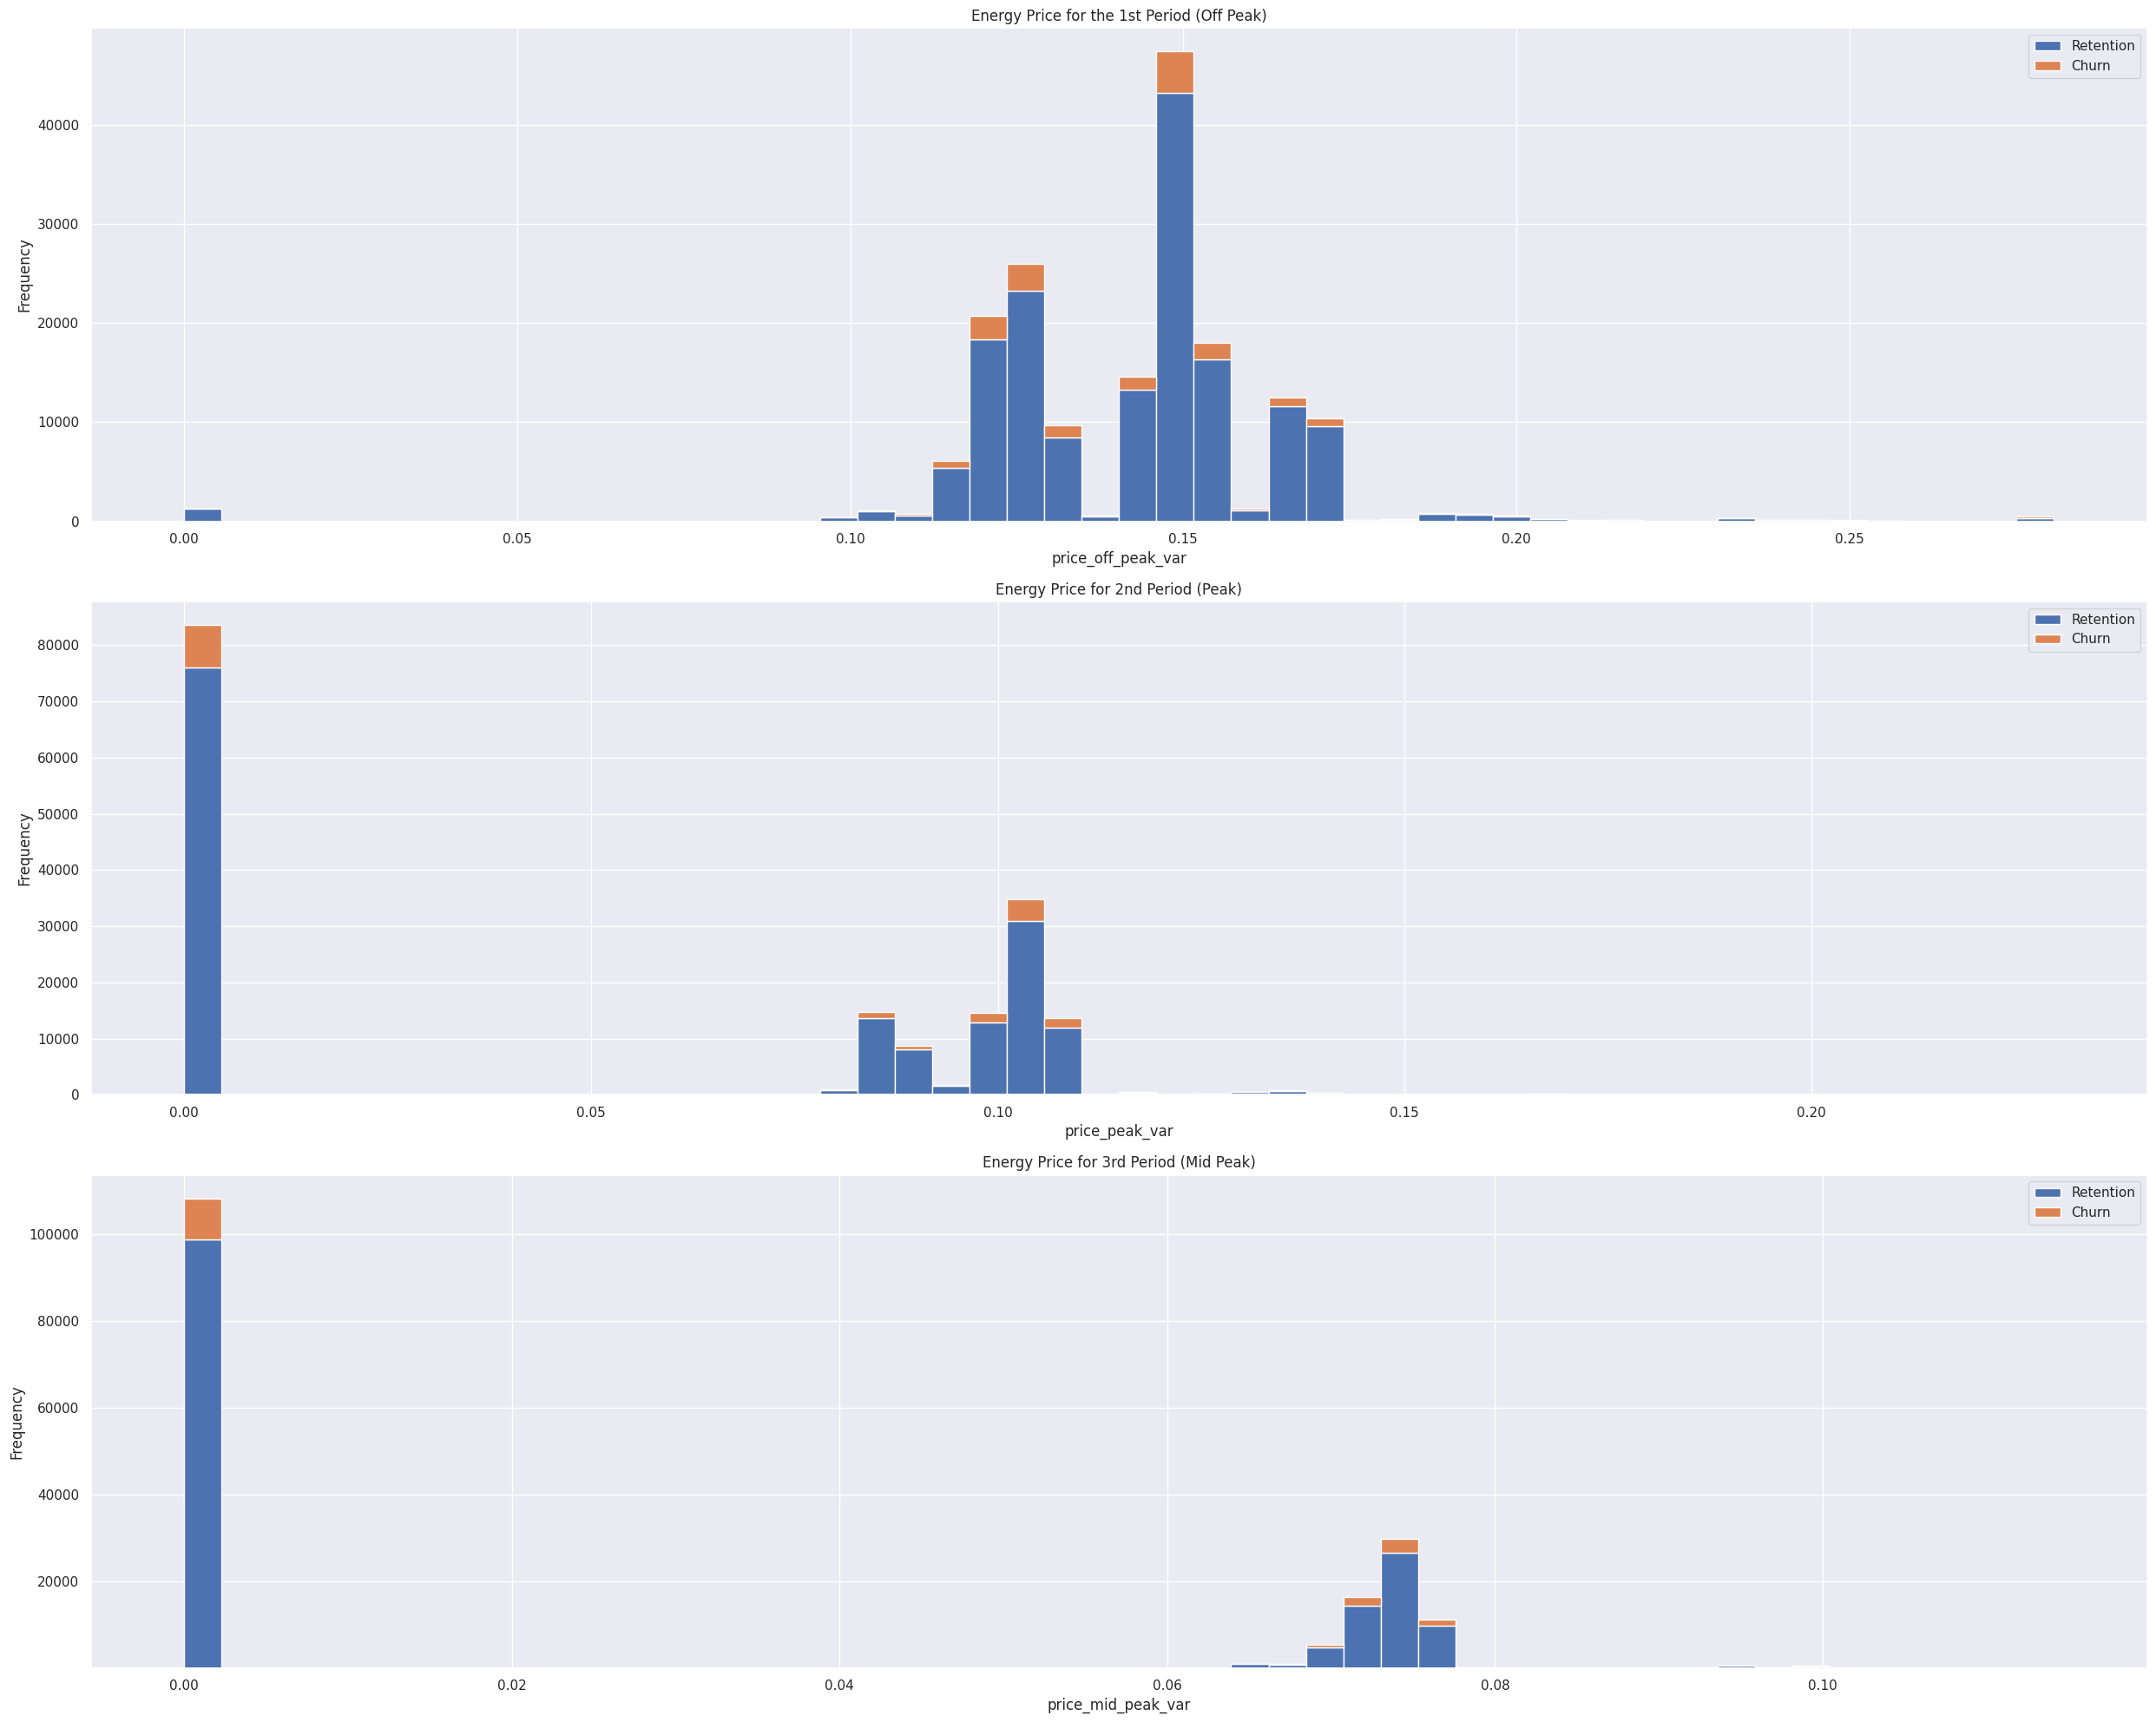

In [45]:
fig, axs = plt.subplots(nrows=3, figsize=(25, 20))

plot_distribution(price_churn, 'price_off_peak_var', axs[0])
plot_distribution(price_churn, 'price_peak_var', axs[1])
plot_distribution(price_churn, 'price_mid_peak_var', axs[2])

axs[0].set_title('Energy Price for the 1st Period (Off Peak)')
axs[1].set_title('Energy Price for 2nd Period (Peak)')
axs[2].set_title('Energy Price for 3rd Period (Mid Peak)')

plt.tight_layout()
plt.show()

##### Do the same thing for power price:

In [46]:
# price sensitivity of power
price_churn = price_churn_df[['id', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix', 'churn']]

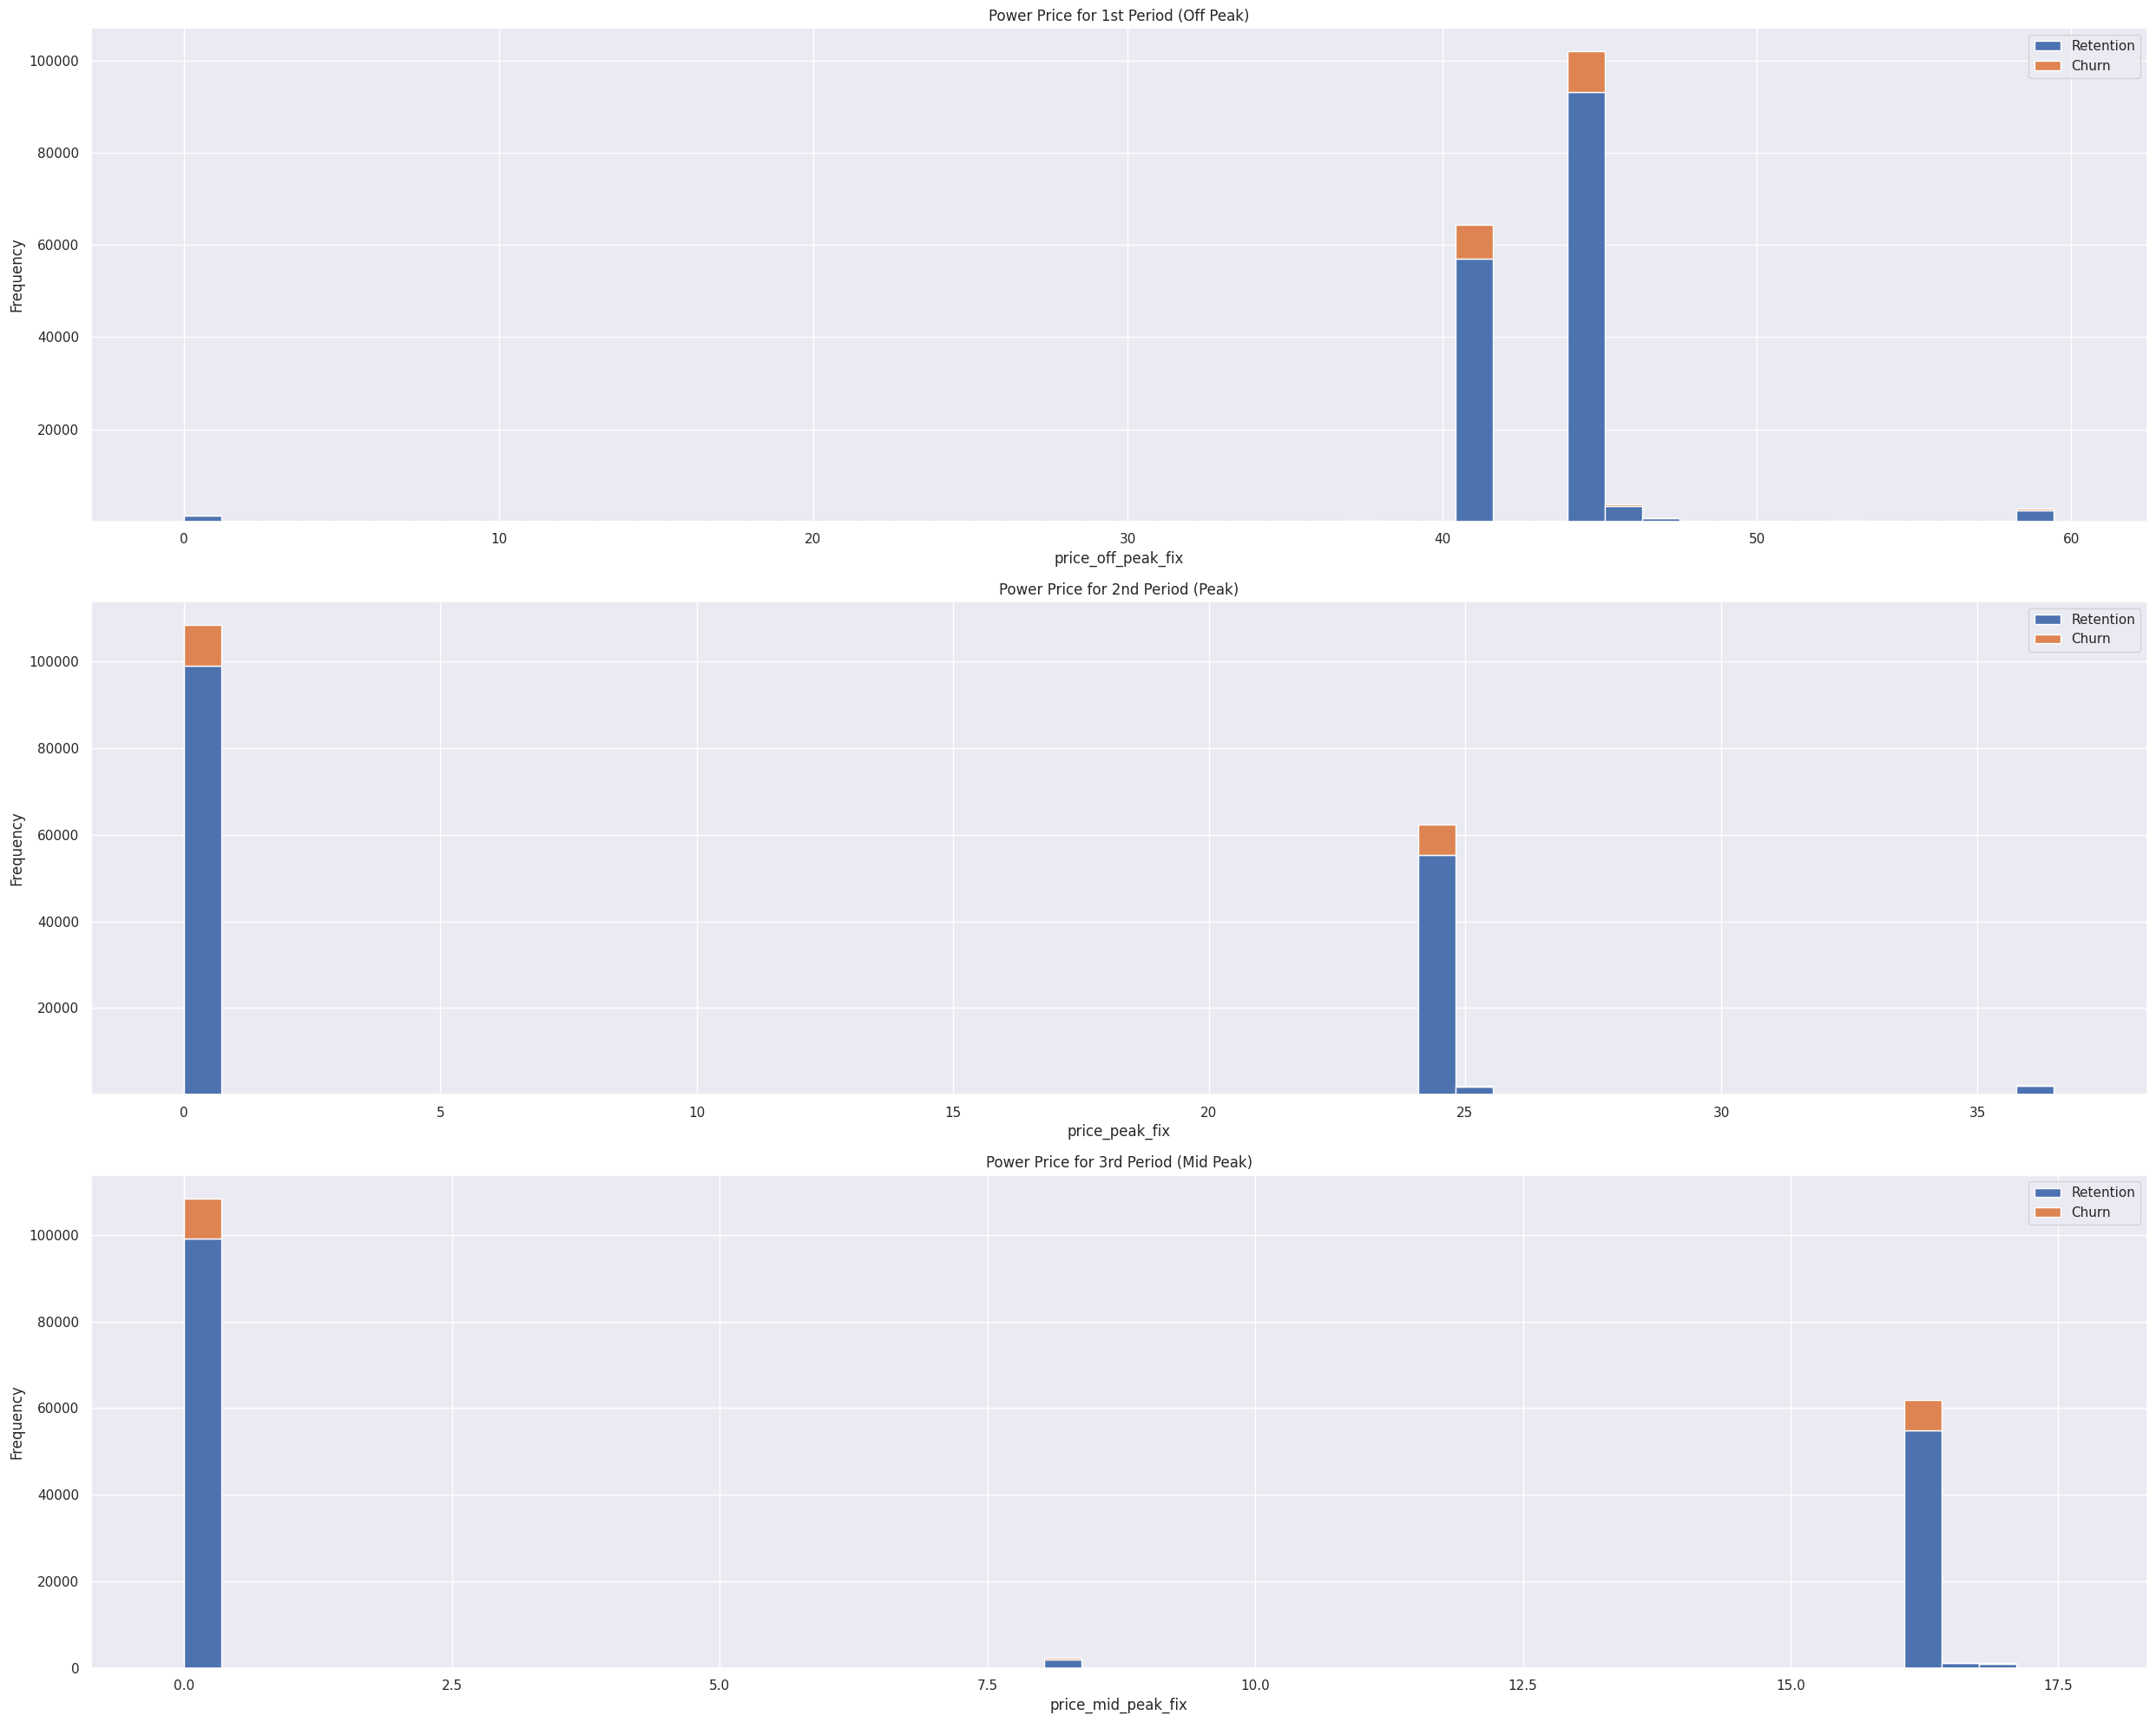

In [47]:
fig, axs = plt.subplots(nrows=3, figsize=(25, 20))

plot_distribution(price_churn, 'price_off_peak_fix', axs[0])
plot_distribution(price_churn, 'price_peak_fix', axs[1])
plot_distribution(price_churn, 'price_mid_peak_fix', axs[2])

axs[0].set_title('Power Price for 1st Period (Off Peak)')
axs[1].set_title('Power Price for 2nd Period (Peak)')
axs[2].set_title('Power Price for 3rd Period (Mid Peak)')

plt.tight_layout()
plt.show()

#### Sum up: In the first period, when price is around 0.15, there are more customer churning. It seems the price changes from the off-peak(first period) leads to some customer churn, and it effects the customer churn in peak/second period and mid/third period, because even when the price of energy is 0, there are customer churn. In second period, there are customer churning when energy price is around 0.1; in third period, customer churned when energy price is around 0.7-0.8.
#### Similar pattern happened in the power price changes. In the first period, when the power price is from 41-45, customer churned. The impact lasted to the second and third period. However, in the second period, customer churned when the price is around 25; in the third period, customer churned when the price is around 16.

---
## Merge datasets for later use

##### We found that the each "id" in the datasets are unique and very complicated, in order to further analyze the dataset better, we can use the Set ID column as the index. First, join the 2 datasets with the shared 'id':

In [48]:
merged_df = pd.merge(client_df, price_df, how = 'left', on = 'id')
merged_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


##### Then we Set ID column as the index:

In [49]:
merged_df.set_index('id', inplace = True)
merged_df.head(3)

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
id,,,,,,,,,,,,,,,,,,,,,
24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


---
## Conclusion
There are nearly 10% customer churn rate, and it seems it is related to the forecasted as well as actural energy & power price.

The distributions of consumption, forecast, and suscribed power & power suscription are very skewed(positive) and have outliers.

Some sales channels have customer churn but some not. The sale channel 'foodsdfp....' has the highest churn rate.

Forecasted price changes & customer churn:
In the first period, when energy price is around 0.1-0.15, and when power price is around 40-45, there are more customer churning, this effect last to the second period.


Actual price changes & customer churn:
In the first period, when energy price is around 0.15, there are more customer churning. The impact lasted to the second and third period, because even when the price of energy is 0, there are customer churn. In second period, there are customer churning when energy price is around 0.1; in third period, customer churned when energy price is around 0.7-0.8.

Similar pattern happened to the power price changes. In the first period, when the power price is from 41-45, customer churned. The impact lasted to the second and third period. However, in the second period, customer churned when the price is around 25; in the third period, customer churned when the price is around 16.
